# Machine Learning Tutorial
    Author:    Theodora Tataru
               C00231174
    Tutor:     Greg Doyle
    Course:    Software Development, 4th year
    Institute: Institute of Technology Carlow
    Year:      2020

### This tutorial focuses on various preprocessing data techniques and algorithms
#### Artificial Intelligence
   1. <a href="#intro"> Introduction </a>
   2. <a href="#req"> Requirements </a>
   3. <a href="#AI"> Artificial Intelligence </a>
   4. <a href="#tools"> Tools </a>
   5. <a href="#mla"> Machine Learning Algorithms </a>
   
#### Machine Learning Algorithms:
   1. <a href="#missing_data"> Latent Dirichlet Allocation (LDA) </a>
   2. <a href="#CNN">Convolutional Neural Network</a>
   3. <a href ="#decision_tree"> Decision Tree </a>
   4. <a href ="#random_forest"> Random Forest </a>
   5. <a href ="#reinforcement_learning"> Reinforcement Learning and Deep Neural Network </a> 
   
    



<a id="intro"> </a>
# Introduction

This tutorial is designed to tackle different aspects of Machine Learning, such as pre-processing data, machine learning algorithms - training, testing and predictions.
The tutorial aims to explain some different algorithms used in pre-processing data machine learning models.

<a id="req"> </a>
# Requirements

Before starting this tutorial, few requirements need to be satisfied:
   1. Python knowledge is required
   2. The following need to be installed on the system:
       #### Python 3
       <code> sudo apt-get install python3.8 </code>
       #### Tensorflow
       <code> python3 -m pip install tensorflow </code>
       #### Keras
       <code> sudo apt-get install keras </code>
       #### Matplotlib
       <code> python3 -m pip install mathplotlib </code>
       #### NumPy
       <code> python3 -m pip install numpy </code>
       #### Pands
       <code> python3 -m pip install pands </code>

<a id="AI"> </a>
# Artificial Intelligence

In this section, several aspects of machine learning are described at a high-level. Reading this section is extremely important for a clear understanding of the algorithms explained above.

Artificial Intelligence is the intelligence implemented into machines. This ability can be gained by performing
statistical operations on data.
To start the learning progress of the AI, a collection of data is be fed to the system as learning data points. The
data fed to the AI needs to be accurate and clean – from any unnecessary information. This data is the single
source of knowledge of AI and is the base of Artificial Intelligence.
There are many ways AI can learn, and the most popular ways are: Machine Learning and Deep Learning.
The human brain is programmed by the DNA that defines neural structures. These structures inside change the path
of neural activity and organism behavior as a result of our experiences.
There are several ways to simulate these learning mechanisms in computers [49].
For learning to happen in both flash and silicon matter, the following are needed:
    - A way for the system to understand what is expected of it
    - A way for the system to remember the information needed
    - A way for the system to input information
    - A way for the system to output information
    - A way to load algorithms into the system
    - Physical matter (hardware for machines) to support all the above bullet points.

Since the beginning of AI, the learning system has shifted from algorithms that rely on logic and rules to
machine learning, in which case the algorithms contain fewer rules and absorb training data points to learn, as
humans, by trial and error. 
![alt text](AiEvolution.png "Title")

Thanks to powerful computers and big data, Machine Learning has now advanced algorithms called neural
networks. These networks are just a collection of computing fundamentals shaped like the neurons in the human
brain, that build stronger or weaker links as they assimilate data [50].
This is very important, as humans, do not recognize a dog by definitions like "if (number of legs==4, and
tail==true, size>cat, color==" brown or white or black)". If this was the case, we would not be able to recognize
a Chikwawa with 3 legs, as a dog. The goal is to make AI think and acknowledge reality as much as possible
as close to humans. 

Machine learning is a part of Artificial Intelligence, that contributes with the ability to allow a machine to learn
and improve from input data. Machine learning focuses on the development of computer programs that can
access data and use it for learning.
Machine learning uses two approaches to train a model :
     - Supervised learning, which ingests a set of input data that describes explicitly what the machine should
focus on. These data points fed to the machine are labeled
    - Unsupervised learning does not feed the AI with labeled data points. In this model, the machine is
supposed to organize data on its own, based on the features of the inserted data
Usually, the supervised learning is used when the AI model is used to make a prediction, while the unsupervised
learning model is used when data needs to be explored.
Machine learning gives a system the ability to learn automatically and improve from experience, without
being precisely programmed or without any human interaction. 

Following, in this section, we have a high-level look at how data is pre-processed, what algorithms are mostly used and how the training and the testing steps are achieved. In later sections, some actions are implemented and explained using Python3.


## There are 3 main Machine Learning Algorithms:
![alt text](ML_algorithms.png "Title")
   ### 1. Supervised Learning
   The supervised machine learning algorithms use labeled data to learn how the mapping function works to map the input variable with the out variable. The supervised learning algorithm consists in several types of supervised learning, but we will focus on two main types:
   #### Classification: 
   It is used to predict the outcome of input data based on cathegories, that the model was trained to recognize.

   #### Regression:
   It is used to predict the outcome of a input data when the output variable is in the form of real values.

    
   ### 2. Unsupervised Learning
   The unsupervised machine learning algorithms are used when the model is fed with input data and the model itself needs to organize data on its own, based on patterns and features of the inserted data.
   Again, there are several types of unsupervised machine learning models, but we will focus on the two main types:
   #### Association
   It is used to discover relations between input variables. It is highly used in the market analysis as it easily computes the probability of the co-occurrence of items in a collection.
   #### Clustering
   is used to group the input data as similarities are found.
    
   ### 3. Reinforcement Learning:
   Reinforcement learning is a different type of algorithm, that is designed to allow an agent to predict the best next move. The decision is based on the agent's current state and by learning behaviors that maximaze, it's reward.

<a id="tools"> </a>
# Tools
    - python
    - tensorflow
    - keras
    - numpy
    - matplotlib
    - pandas
    - seaborn
    - sklearn 
    

<a id="mla"> </a>
# Machine Learning Algorithms

The following sections will guide through different machine learning algorithms, one at a time. Each algorithm is designed to highlight its strengths and weaknesses, and if things are getting too complicated too fast, you can find the source of these algorithms in the <b>References</b> section at the very bottom.


<a id="missing_data"></a>
## Latent Dirichlet Allocation (LDA)

### Packages needed:
    - Python 3
    - Pandas
    - NumPy
    - Scikit-Learn
### Overview
#### Dataset: Diabetes dataset [1]
    - Diabetes Dataset
    - Has missing values: YES
    - Source: National Institute of Diabetes and Digestive Kidney Diseases
    - Date: 1990
    - Number of instances: 768
    - Number of attributes: 8+
           1. Number of times pregnant
           2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
           3. Diastolic blood pressure (mm Hg)
           4. Triceps skinfold thickness (mm)
           5. 2-Hour serum insulin (mu U/ml)
           6. Body mass index (weight in kg/(height in m)^2)
           7. Diabetes pedigree function
           8. Age (years)
           9. Class variable (0 or 1)
#### Process [1]:
   - mark missing values
   - remove rows with missing values
   - replace missing values
   - use algorithms that support missing values

  

### 1. Handeling missing values

In [1]:
## Mark Missing values
from pandas import read_csv ## used to load the dataset
dataset = read_csv('pima-indians-diabetes.csv') ## load the data set from harddisk
print(dataset) ## print the summary of the dataset, to see missing values

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]


Missing data can be represented by out-of-range values. In a numeric field where values should be positive, missing data can be represented by 0 or negative numbers [1].

In [2]:
## usingPanda DataFrame, we can print the dataset summary statistics on each field
print(dataset.describe())

                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

            0.627          50           1  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

As seen in the above line, there are fields that have a minimum value of zero. On some columns, the value of zero does not make sense and indicates that their values are missing [1].

Columns with missing values:

    1: Plasma glucose concentration
    2: Diastolic blood pressure
    3: Triceps skinfold thickness
    4: 2-Hour serum insulin
    5: Body mass index


In [3]:
## We can confirm the missing values, by analyzing the raw data. Therefore, we will print the first 10 rows of the dataset
print(dataset.head(10))

    6  148  72  35    0  33.6  0.627  50  1
0   1   85  66  29    0  26.6  0.351  31  0
1   8  183  64   0    0  23.3  0.672  32  1
2   1   89  66  23   94  28.1  0.167  21  0
3   0  137  40  35  168  43.1  2.288  33  1
4   5  116  74   0    0  25.6  0.201  30  0
5   3   78  50  32   88  31.0  0.248  26  1
6  10  115   0   0    0  35.3  0.134  29  0
7   2  197  70  45  543  30.5  0.158  53  1
8   8  125  96   0    0   0.0  0.232  54  1
9   4  110  92   0    0  37.6  0.191  30  0


To simplify things, we can print the count of the number of missing values on each column. 
For better visualization, we will mark all missing values as "True", and then, we can count the the "True" values for each column [1].

In [4]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
## count the number of missing values from all 5 columns
missing = (dataset[[0,1,2,3,4,5,6,7,8]] == 0).sum()
print(missing)

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64


It can be seen that columns 1, 2 and 5 has few missing value, while column 3, 4 and 8 have many missing values.
In Python, missing values are usually marked as NaN. This values Nan are ignored when operations are performed [1].

In [5]:
from numpy import nan
## replacing all zero values by nan in the dataset
dataset[[0,1,2,3,4,5,6,7,8]] = dataset[[0,1,2,3,4,5,6,7,8]].replace(0,nan)
print(dataset.isnull().sum())

0    111
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8    500
dtype: int64


As the sum of counting the zeros in the dayaset, matches the counting when using nan, confirms that we marked and identified the missing values correctly. 

In [6]:
## confirming that the zero values were replaced by NaN
print(dataset.head(10))

      0      1     2     3      4     5      6   7    8
0   6.0  148.0  72.0  35.0    NaN  33.6  0.627  50  1.0
1   1.0   85.0  66.0  29.0    NaN  26.6  0.351  31  NaN
2   8.0  183.0  64.0   NaN    NaN  23.3  0.672  32  1.0
3   1.0   89.0  66.0  23.0   94.0  28.1  0.167  21  NaN
4   NaN  137.0  40.0  35.0  168.0  43.1  2.288  33  1.0
5   5.0  116.0  74.0   NaN    NaN  25.6  0.201  30  NaN
6   3.0   78.0  50.0  32.0   88.0  31.0  0.248  26  1.0
7  10.0  115.0   NaN   NaN    NaN  35.3  0.134  29  NaN
8   2.0  197.0  70.0  45.0  543.0  30.5  0.158  53  1.0
9   8.0  125.0  96.0   NaN    NaN   NaN  0.232  54  1.0


Having missing values in a training dataset can cause errors in the machine learning algorithms and lead to erroneous predictions.
It is essential to handle the missing data prior to developing the model and the training process.

#### Removing the missing values
The easiest and simplistic strategy to handle the missing data is to remove all records containing missing data.
To achieve this, a new Panda DataFrame can be created with the rows containing the missing values removed.
Pandas provide a function dropna(), that can be used to remove columns or rows with missing data. In our example, we will use this function to remove all wors that contain missing data [1].

In [7]:
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


The output of the code above:
    - the first row shows the initial number of rows contained in the dataset
    - the second row shows the remaining number of rows that do not contain missing data.

Now that the data had been cleaned for missing values, an algorithm sensitive to missing data can be used to determine the accuracy that can be obtained with the remaining data [1]. 

### 2. Training the model 
LDA is an unsupervised learning algorithm that views data as words and works on making a key assumption [2].

Running this algorithm, the output might vary, given the nature of the algorithm. The algorithm should be executed a few times in a row and compute the average outcome to determine the average accuracy that the data can provide [2].


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


The approach presented above, which implies the deletion of all rows containing missing values, can limit the model's prediction. Therefore, new methods of dealing with missing values will be detailed below [1].

#### Impute Missing Values
This method implies the replacement of missing values, and there are many ways of replacing missing values, such as:
Replacing a missing value with:
    1. a constant value that has meaning 
    2. a random value from another record
    3. a mean, median or mode value for that column
    4. a value estimated by another predictive value
Each option presented above will have a different impact on the model, and on the predictions, the model will produce. 
Pandas, provide a function called fillna(), that replaces missing values with a specific value [1].
##### Replacing missing values with the mean of the column.
This function allows the developer to specify the value that replaces the missing value and the technique used to replace it [1].
The Pipeline is used to define the modeling pipeline, where data is primarly passed through the SimpleImputer to be transformed,  and only after fed to the model [1]. 

In [9]:
# example of evaluating a model after an imputer transform
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# define the model
lda = LinearDiscriminantAnalysis()
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.762


Let's compare the accuracy from the LDA algorithm that removes the rows with missing values and the accuracy of the model that replaced the missing values with the column's mean. We can observe that accuracy had decreased.
Try replacing the missing values with other values and compare the results again. For a more detailed example of imputing missing values, check this tutorial: https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/

<a id="CNN"> </a>
## Convolutional Neural Networks

### Packages needed:
    - Python 3
    - Tensorflow
    - mathplotlib
    - keras
### Overview
#### Dataset: Cifar-10 
    - Cifar-10
    - Has missing values: NO
    - Source: Keras
    - Date: 1990
    - Number of instances: 60,000
    - Number of labels: 10
           1. airplace
           2. automobile
           3. bird
           4. cat
           5. deer
           6. dog
           7. frog
           8. horse
           9. ship
           10. truck
#### Process:
   1. Introduction to Convolutional Neural Network 
   2. Requirements
   3. Dividing tthe dataset into training and testing set
   4. Verify the data
   5. Creating the sequential model
   6. Training the model and testing the model
   7. Data Augmentation
   8. Training the model and testing the model (data augmentation)
   9. Conclusion

### 1. Introduction to Convolutional Neural Network 

Convolutional Neural Network (CNN) is very popular in deep learning algorithms that involve computer vision. They are used to classify images by categorizing them by similarities. Multiple CNN algorithms can identify faces, streets, animals, road signs and others [21].

CNNs are created after the Human Brain, where individual neurons respond to different stimuli based on what the person sees, feels, and hears, in other words, based on the input. 

<img src="CNN.png" alt="CNN" width="500px"> [20]

Above, you can see an image that describes briefly how a CNN network looks like.
The circles in the images are called neurons, and the links in between the de neurons are called links. Each neuron receives a large number of inputs from the prior layer and then computes a weighted count, which it then passes through an activation function before responding with an output [22].

As humans, we identify images using our knowledge of colors, shapes, size, and other factors, but computers do not possess the human ability. Computer "see" images in a very different, mathematical way. An image is a collection of pixels in a 2D array (matrix). 

<img src="computer_reading_image.png" alt="CNN" width="500px"> [23]

For a computer, a black and white image is a 2D Matrix, while a colored image is a 3D matrix with RGB channels ranging from 0 to 255 [23].


In simple terms, with the of Convolutional Neural Networks, the process is happening as follows [23]:
   - Input an image into the mode
   - Perform Convolutional operations to get the activation map
   - To make our model more stable, use the pooling layer
   - Use the "relu" activation layer to avoid non-linearity
   - Flatten the image into a linear vector
   - The vector is then fed to the fully connected artificial neural network
   - The fully connected layer will provide a classification
   
 
 If this sounds too complicated, do not worry, I will explain everything as we follow the tutorial.

This tutorial will guide you step by step into the training and testing CNN model to classify images. Keras Sequential API is used for this model to create and train the model [3].

<b>Sequential API</b> allows the developers of the model to arrange the layers in sequential order, meaning that the flow of data is processed only in one direction. The disadvantage is that this sequential model does not allow us to build a model with multiple inputs and outputs. 

### 1.  Requirements

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets, layers, models

/usr/lib/python3/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [11]:
#This method will mark the start and the end of the training and testing the models
def date_and_time_now():
    import datetime
    now = datetime.datetime.now()
    return now.strftime("%Y-%m-%d %H:%M:%S")

### 2.  Dividing tthe dataset into training and testing set
The <b>cifar-10</b> image dataset is composed of 60,000 colored images, with a size 32x32 and 10 labels. Each class contains 6,000 images. 
From the whole set of 60,000 images, 50,000 will be used for training and 10,000 for testing. The classes are unique, and there is no overlap in between them [3].

In [12]:
# downloading the data and dividing it into the training and testing set
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalizing the pixel values from 255-0 to 1-0. This step is performed to facilitate the training process's speed, as large values can disrupt or slow down the process learning process. It is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### 3. Verify the data

In [14]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

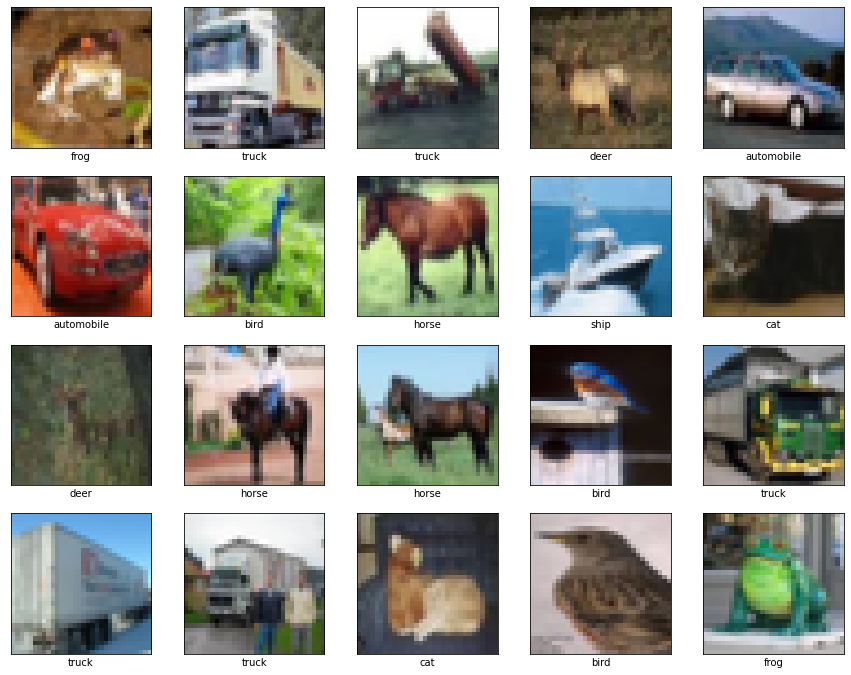

In [15]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])
plt.show()

### 4. Creating the sequential model

   - <b>Con2D</b> is the input layer that creates a convolutional kernel that feeds its input to the next available layer. The input images are RGB(colored) images with 32x32 dimensions. "relu" is a function that outputs the input directly to the next layer if it is positive, or in case it is negative, outputs 0.
   In basic terms, the convolutional layer attempts to learn from an image by forming a convolutional layer by making a dot product between the filter value and the image pixel values [23].
   - <b>MaxPooling2D</b> layer reduces the dimension of images by reducing the number of pixels in the output from the previous layer.
   In more simple terms, this layer replaces the output with a max summary of the image.
   - <b>Flatten</b> layer is converting the data from a multi-dimensional array to a 1 dimension array. The reason for using this layer is to create a single long feature vector.
   - <b>Dense</b> layer is special, it is fully connected with the previous layer; in other words, this layer's neurons are all connected with every neuron of the previous layer.

In [16]:
def define_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten(input_shape=(28, 28)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    return model

Sumarize the arhitecture of the model:

In [17]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As seen above, the images are shrinking as they are going deeper into the model, this is done so that the model can perform computationally more output channels in each Conv2D layer.

To complete the model, the last two layers, called Dense, perform the classification. These layers take vectors as input from the Flatten layer.

### 5 . Training the model and testing the model
Compiling parameters:
   - <b>optimizers</b> [9] 
       - <b>adam</b> is an algorithm, one of the most popular used in CNNs, used in computer vision and natural language processing. The optimizer is computationally efficient and requires little memory to perform. It is appropriate for problems with noisy gradients
       - <b>adagrad</b> is an algorithm for gradient-based optimization that adapts the learning rate to the parameters, performing small updates where suitable
       - <b>adadelta</b> is an extension of <b>adagrad</b> that is less agressive, decreasing the learning rate.
       - <b>RMSprp</b> is an adaptive learning algorithm that divides the learning rate by exponentially decaying the average of squared gradients
       - <b>adamax</b> is an algorithm that updates the scaling rule inverse proportionally to the norm of the past gradients and current gradients
       - <b>nadam</b> can be seen as a combination of Adam and NAG algorithms
       - More details on https://ruder.io/optimizing-gradient-descent/index.html#momentum
   - <b>loss</b> is calculate as a difference between predictions and the true labels. The value of loss shows how poorly or well the model behaves during training

In [18]:
def compile_model():
    models = {}
    optimizers = ["adam", "adamax", "adagrad", "adadelta",  "RMSprop", "nadam"]
    for opt in optimizers:
        print("_________________________________________________________________________________________________________________")
        print("----->Training the model with:", opt, "oprimizer")
        model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

        #################################################################################################################
        # Evaluate the training process
        print("----->Evaluation of the training process for:", opt)
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title(opt)
        plt.ylim([0.5, 1])
        plt.legend(loc='lower right')
        plt.show()

        #################################################################################################################
        # testing the model
        test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
        print('----->Test accuracy for', opt, ':', test_acc)

        #################################################################################################################
        # predictions
        print("----->Prediction for:", opt)
        predictions = model.predict(test_images)
        import numpy as np

        COLOR = 'white'
        plt.rcParams['text.color'] = COLOR
        plt.rcParams['axes.labelcolor'] = COLOR
        def predict(model, image, correct_label):
            classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                       'dog', 'frog', 'horse', 'ship', 'truck']
            prediction = model.predict(np.array([image]))
            predicted_class = classes[np.argmax(prediction)]
            show_image(image, classes[correct_label], predicted_class)
        def show_image(img, label, guess):
            plt.figure()
            plt.imshow(img, cmap=plt.cm.binary)
            print("Expected: " + label)
            print("Guess: " + guess)
            plt.colorbar()
            plt.grid(False)
            plt.show()
        
        import random
        num = random.randint(1,10000)
        image = test_images[num]
        label = test_labels[num][0]
        predict(model, image, label)
        
        models[opt] = model
    return models

In [19]:
# marking the start of the process of the simple model
start_simple_model = date_and_time_now()

_________________________________________________________________________________________________________________
----->Training the model with: adam oprimizer
Epoch 1/10
1563/1563 [==============================] - 79s 49ms/step - loss: 1.7441 - accuracy: 0.3586 - val_loss: 1.2456 - val_accuracy: 0.5579
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.1926 - accuracy: 0.5783 - val_loss: 1.0627 - val_accuracy: 0.6269
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0275 - accuracy: 0.6382 - val_loss: 1.1058 - val_accuracy: 0.6247
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9260 - accuracy: 0.6742 - val_loss: 0.9637 - val_accuracy: 0.6670
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8474 - accuracy: 0.7045 - val_loss: 0.8860 - val_accuracy: 0.6903
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7792 - accuracy: 0.7251 - val_

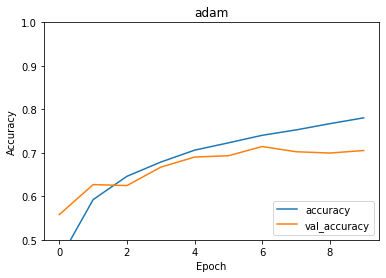

313/313 - 3s - loss: 0.8873 - accuracy: 0.7053
----->Test accuracy for adam : 0.705299973487854
----->Prediction for: adam
Expected: horse
Guess: horse


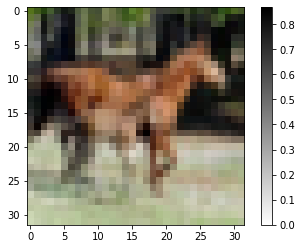

_________________________________________________________________________________________________________________
----->Training the model with: adamax oprimizer
Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.4983 - accuracy: 0.8256 - val_loss: 0.8352 - val_accuracy: 0.7293
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4440 - accuracy: 0.8456 - val_loss: 0.8689 - val_accuracy: 0.7255
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.4316 - accuracy: 0.8525 - val_loss: 0.8518 - val_accuracy: 0.7336
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4114 - accuracy: 0.8580 - val_loss: 0.8733 - val_accuracy: 0.7301
Epoch 5/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.4063 - accuracy: 0.8590 - val_loss: 0.8797 - val_accuracy: 0.7312
Epoch 6/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.3892 - accuracy: 0.8667 - va

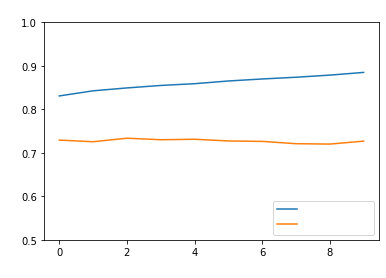

313/313 - 3s - loss: 0.9432 - accuracy: 0.7269
----->Test accuracy for adamax : 0.7268999814987183
----->Prediction for: adamax
Expected: dog
Guess: dog


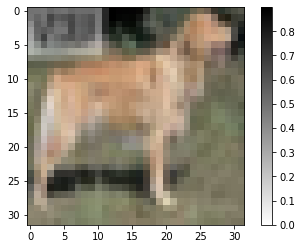

_________________________________________________________________________________________________________________
----->Training the model with: adagrad oprimizer
Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.3057 - accuracy: 0.9013 - val_loss: 0.9411 - val_accuracy: 0.7333
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.2835 - accuracy: 0.9099 - val_loss: 0.9444 - val_accuracy: 0.7305
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2844 - accuracy: 0.9098 - val_loss: 0.9487 - val_accuracy: 0.7315
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2843 - accuracy: 0.9104 - val_loss: 0.9495 - val_accuracy: 0.7317
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.2774 - accuracy: 0.9123 - val_loss: 0.9525 - val_accuracy: 0.7307
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.2781 - accuracy: 0.9122 - v

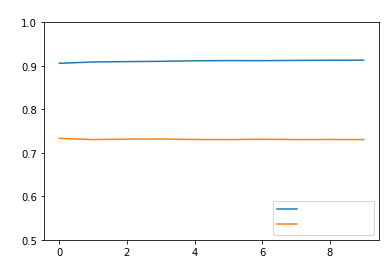

313/313 - 3s - loss: 0.9596 - accuracy: 0.7304
----->Test accuracy for adagrad : 0.730400025844574
----->Prediction for: adagrad
Expected: ship
Guess: ship


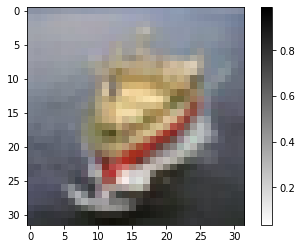

_________________________________________________________________________________________________________________
----->Training the model with: adadelta oprimizer
Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2800 - accuracy: 0.9132 - val_loss: 0.9602 - val_accuracy: 0.7305
Epoch 2/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.2720 - accuracy: 0.9150 - val_loss: 0.9605 - val_accuracy: 0.7309
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.2779 - accuracy: 0.9124 - val_loss: 0.9608 - val_accuracy: 0.7304
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.2712 - accuracy: 0.9160 - val_loss: 0.9611 - val_accuracy: 0.7305
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.2757 - accuracy: 0.9126 - val_loss: 0.9613 - val_accuracy: 0.7304
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.2766 - accuracy: 0.9139 - 

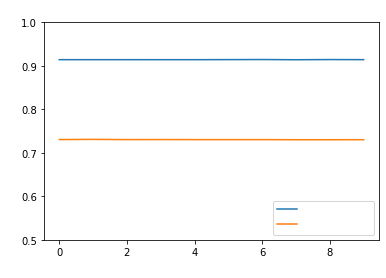

313/313 - 3s - loss: 0.9626 - accuracy: 0.7302
----->Test accuracy for adadelta : 0.7301999926567078
----->Prediction for: adadelta
Expected: dog
Guess: dog


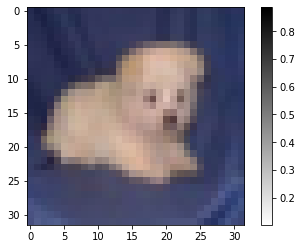

_________________________________________________________________________________________________________________
----->Training the model with: RMSprop oprimizer
Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4854 - accuracy: 0.8282 - val_loss: 1.0733 - val_accuracy: 0.6971
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4687 - accuracy: 0.8341 - val_loss: 0.9894 - val_accuracy: 0.7095
Epoch 3/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.4530 - accuracy: 0.8432 - val_loss: 1.0714 - val_accuracy: 0.7054
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4456 - accuracy: 0.8421 - val_loss: 1.1256 - val_accuracy: 0.7026
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4171 - accuracy: 0.8544 - val_loss: 1.1188 - val_accuracy: 0.6956
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4039 - accuracy: 0.8570 - v

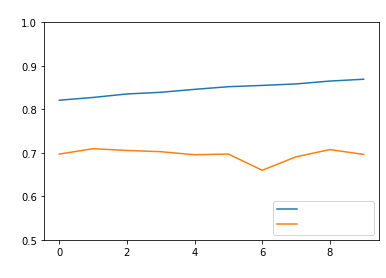

313/313 - 3s - loss: 1.3788 - accuracy: 0.6964
----->Test accuracy for RMSprop : 0.696399986743927
----->Prediction for: RMSprop
Expected: ship
Guess: ship


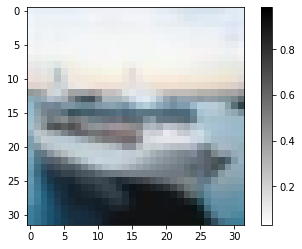

_________________________________________________________________________________________________________________
----->Training the model with: nadam oprimizer
Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.3147 - accuracy: 0.8873 - val_loss: 1.3133 - val_accuracy: 0.6904
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2744 - accuracy: 0.9030 - val_loss: 1.3761 - val_accuracy: 0.6822
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2676 - accuracy: 0.9023 - val_loss: 1.3512 - val_accuracy: 0.6982
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.2465 - accuracy: 0.9105 - val_loss: 1.4108 - val_accuracy: 0.6963
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2360 - accuracy: 0.9161 - val_loss: 1.4328 - val_accuracy: 0.7008
Epoch 6/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.2141 - accuracy: 0.9216 - val

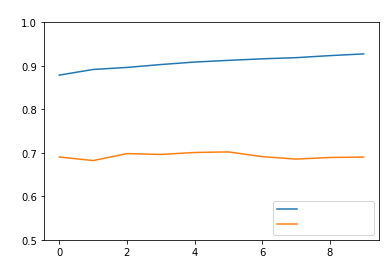

313/313 - 3s - loss: 1.6768 - accuracy: 0.6902
----->Test accuracy for nadam : 0.6901999711990356
----->Prediction for: nadam
Expected: truck
Guess: truck


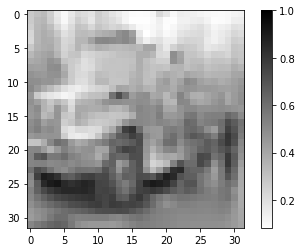

In [20]:
models = compile_model()

In [21]:
# marking the end of the process of the simple model
end_simple_model = date_and_time_now()

Testing the same dataset with different optimizers gave us a broad prospect over different learning curves. The optimizers with the highest test accuracy scores over 70% were <b>adamax, adagrad</b> and <b>adadelta</b> but at the same time, the rest of the optimizers did not score less than 69%, which is not bad at all, as all this was achieved with a few lines of code.

### 6. Data Augmentation
Forward we are going to try to improve the model with Data Augmentation, which involves making copies of the images in the dataset, with small random modifications [10]. In simple terms, data augmentation involves modifying the pictures from the dataset. This action will expand the training dataset and allow the model to learn the same general features differently. 
There are many data augmentation that could be applied to images, such as [10]:
   1. flip the images 
   2. rotation 
   3. scale
   4. crop
   5. translation
   
Given that our tutorial dataset involves small photos of objects, we need to use data augmentation that does not distort the images too much. Therefore, we will <b>horizontally flip the images, zooming the images, shifting the images' height, and cropping</b> [10].

In the next code section, the data set is populated with the additional "modified" images as specified above. Then, the training process re-starts with the new dataset.

### 7. Training the model and testing the model (data augmentation)

#### <b>Note:</b> As the dataset is consistently larger, with the new modified images added, the process of training and testing will be consistently longer.

In [22]:
# marking the start of the process of the data augmentation model
start_DA_model = date_and_time_now()

_________________________________________________________________________________________________________________
----->Training the model with: adam oprimizer
Epoch 1/100
781/781 [==============================] - 84s 107ms/step - loss: 1.0215 - accuracy: 0.6615 - val_loss: 0.9869 - val_accuracy: 0.6863
Epoch 2/100
781/781 [==============================] - 83s 107ms/step - loss: 0.8958 - accuracy: 0.6914 - val_loss: 0.8869 - val_accuracy: 0.7118
Epoch 3/100
781/781 [==============================] - 84s 107ms/step - loss: 0.8607 - accuracy: 0.7023 - val_loss: 0.8736 - val_accuracy: 0.7139
Epoch 4/100
781/781 [==============================] - 84s 107ms/step - loss: 0.8260 - accuracy: 0.7129 - val_loss: 0.8143 - val_accuracy: 0.7272
Epoch 5/100
781/781 [==============================] - 83s 107ms/step - loss: 0.8020 - accuracy: 0.7197 - val_loss: 0.8455 - val_accuracy: 0.7171
Epoch 6/100
781/781 [==============================] - 84s 108ms/step - loss: 0.7778 - accuracy: 0.7300 - val_

781/781 [==============================] - 78s 100ms/step - loss: 0.5429 - accuracy: 0.8101 - val_loss: 0.6555 - val_accuracy: 0.7834
Epoch 56/100
781/781 [==============================] - 78s 100ms/step - loss: 0.5387 - accuracy: 0.8092 - val_loss: 0.6150 - val_accuracy: 0.7992
Epoch 57/100
781/781 [==============================] - 78s 99ms/step - loss: 0.5392 - accuracy: 0.8127 - val_loss: 0.6233 - val_accuracy: 0.7960
Epoch 58/100
781/781 [==============================] - 78s 99ms/step - loss: 0.5380 - accuracy: 0.8102 - val_loss: 0.6678 - val_accuracy: 0.7792
Epoch 59/100
781/781 [==============================] - 78s 100ms/step - loss: 0.5310 - accuracy: 0.8144 - val_loss: 0.6848 - val_accuracy: 0.7768
Epoch 60/100
781/781 [==============================] - 78s 99ms/step - loss: 0.5346 - accuracy: 0.8129 - val_loss: 0.6260 - val_accuracy: 0.7943
Epoch 61/100
781/781 [==============================] - 78s 99ms/step - loss: 0.5341 - accuracy: 0.8144 - val_loss: 0.6682 - val_accur

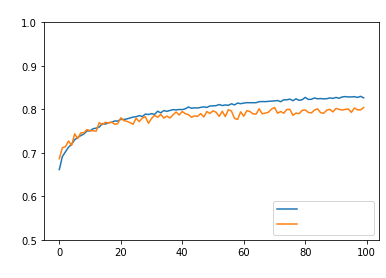

----->Test accuracy for adam : 0.8041999936103821
_________________________________________________________________________________________________________________
----->Training the model with: adamax oprimizer
Epoch 1/100
781/781 [==============================] - 84s 107ms/step - loss: 0.4894 - accuracy: 0.8284 - val_loss: 0.6191 - val_accuracy: 0.7983
Epoch 2/100
781/781 [==============================] - 83s 107ms/step - loss: 0.4856 - accuracy: 0.8301 - val_loss: 0.6251 - val_accuracy: 0.7992
Epoch 3/100
781/781 [==============================] - 84s 107ms/step - loss: 0.4834 - accuracy: 0.8311 - val_loss: 0.6330 - val_accuracy: 0.7948
Epoch 4/100
781/781 [==============================] - 83s 107ms/step - loss: 0.4866 - accuracy: 0.8284 - val_loss: 0.6604 - val_accuracy: 0.7918
Epoch 5/100
781/781 [==============================] - 83s 107ms/step - loss: 0.4836 - accuracy: 0.8326 - val_loss: 0.6576 - val_accuracy: 0.7906
Epoch 6/100
781/781 [==============================] - 83s

781/781 [==============================] - 78s 100ms/step - loss: 0.4511 - accuracy: 0.8419 - val_loss: 0.5895 - val_accuracy: 0.8124
Epoch 56/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4463 - accuracy: 0.8433 - val_loss: 0.6005 - val_accuracy: 0.8121
Epoch 57/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4519 - accuracy: 0.8428 - val_loss: 0.6468 - val_accuracy: 0.7950
Epoch 58/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4508 - accuracy: 0.8407 - val_loss: 0.6308 - val_accuracy: 0.8011
Epoch 59/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4446 - accuracy: 0.8436 - val_loss: 0.6572 - val_accuracy: 0.7922
Epoch 60/100
781/781 [==============================] - 78s 99ms/step - loss: 0.4527 - accuracy: 0.8421 - val_loss: 0.6067 - val_accuracy: 0.8078
Epoch 61/100
781/781 [==============================] - 78s 99ms/step - loss: 0.4519 - accuracy: 0.8425 - val_loss: 0.6093 - val_acc

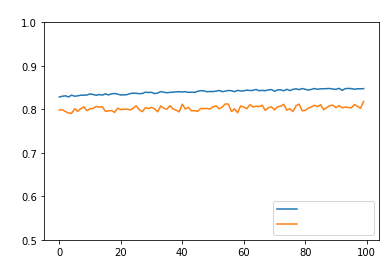

----->Test accuracy for adamax : 0.8181999921798706
_________________________________________________________________________________________________________________
----->Training the model with: adagrad oprimizer
Epoch 1/100
781/781 [==============================] - 79s 101ms/step - loss: 0.4337 - accuracy: 0.8482 - val_loss: 0.6176 - val_accuracy: 0.8073
Epoch 2/100
781/781 [==============================] - 77s 99ms/step - loss: 0.4360 - accuracy: 0.8482 - val_loss: 0.6249 - val_accuracy: 0.8085
Epoch 3/100
781/781 [==============================] - 85s 108ms/step - loss: 0.4380 - accuracy: 0.8465 - val_loss: 0.6289 - val_accuracy: 0.8045
Epoch 4/100
781/781 [==============================] - 87s 112ms/step - loss: 0.4344 - accuracy: 0.8475 - val_loss: 0.6365 - val_accuracy: 0.8094
Epoch 5/100
781/781 [==============================] - 87s 111ms/step - loss: 0.4360 - accuracy: 0.8482 - val_loss: 0.6083 - val_accuracy: 0.8084
Epoch 6/100
781/781 [==============================] - 8

781/781 [==============================] - 83s 106ms/step - loss: 0.4263 - accuracy: 0.8507 - val_loss: 0.6239 - val_accuracy: 0.8058
Epoch 56/100
781/781 [==============================] - 83s 106ms/step - loss: 0.4198 - accuracy: 0.8521 - val_loss: 0.6115 - val_accuracy: 0.8133
Epoch 57/100
781/781 [==============================] - 83s 106ms/step - loss: 0.4233 - accuracy: 0.8520 - val_loss: 0.5974 - val_accuracy: 0.8138
Epoch 58/100
781/781 [==============================] - 83s 106ms/step - loss: 0.4175 - accuracy: 0.8523 - val_loss: 0.6304 - val_accuracy: 0.8071
Epoch 59/100
781/781 [==============================] - 83s 107ms/step - loss: 0.4192 - accuracy: 0.8540 - val_loss: 0.6140 - val_accuracy: 0.8113
Epoch 60/100
781/781 [==============================] - 84s 107ms/step - loss: 0.4218 - accuracy: 0.8524 - val_loss: 0.6096 - val_accuracy: 0.8124
Epoch 61/100
781/781 [==============================] - 83s 106ms/step - loss: 0.4149 - accuracy: 0.8551 - val_loss: 0.6615 - val_a

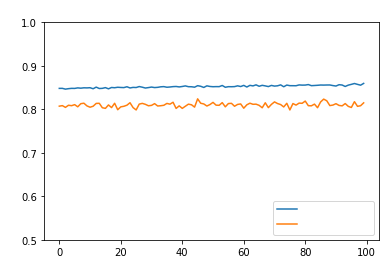

----->Test accuracy for adagrad : 0.8148999810218811
_________________________________________________________________________________________________________________
----->Training the model with: adadelta oprimizer
Epoch 1/100
781/781 [==============================] - 84s 108ms/step - loss: 0.4073 - accuracy: 0.8572 - val_loss: 0.6216 - val_accuracy: 0.8132
Epoch 2/100
781/781 [==============================] - 80s 103ms/step - loss: 0.4069 - accuracy: 0.8578 - val_loss: 0.5968 - val_accuracy: 0.8151
Epoch 3/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4125 - accuracy: 0.8557 - val_loss: 0.6359 - val_accuracy: 0.8071
Epoch 4/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4092 - accuracy: 0.8572 - val_loss: 0.6411 - val_accuracy: 0.8079
Epoch 5/100
781/781 [==============================] - 78s 100ms/step - loss: 0.4139 - accuracy: 0.8552 - val_loss: 0.5980 - val_accuracy: 0.8166
Epoch 6/100
781/781 [==============================] 

781/781 [==============================] - 83s 107ms/step - loss: 0.4015 - accuracy: 0.8616 - val_loss: 0.6205 - val_accuracy: 0.8132
Epoch 56/100
781/781 [==============================] - 85s 109ms/step - loss: 0.4014 - accuracy: 0.8586 - val_loss: 0.6289 - val_accuracy: 0.8123
Epoch 57/100
781/781 [==============================] - 87s 111ms/step - loss: 0.3969 - accuracy: 0.8628 - val_loss: 0.6130 - val_accuracy: 0.8144
Epoch 58/100
781/781 [==============================] - 87s 112ms/step - loss: 0.3995 - accuracy: 0.8597 - val_loss: 0.6454 - val_accuracy: 0.8097
Epoch 59/100
781/781 [==============================] - 86s 110ms/step - loss: 0.3987 - accuracy: 0.8610 - val_loss: 0.6067 - val_accuracy: 0.8170
Epoch 60/100
781/781 [==============================] - 86s 110ms/step - loss: 0.4015 - accuracy: 0.8594 - val_loss: 0.6304 - val_accuracy: 0.8118
Epoch 61/100
781/781 [==============================] - 87s 111ms/step - loss: 0.4006 - accuracy: 0.8616 - val_loss: 0.6296 - val_a

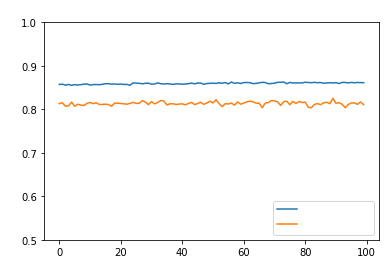

----->Test accuracy for adadelta : 0.8108000159263611
_________________________________________________________________________________________________________________
----->Training the model with: RMSprop oprimizer
Epoch 1/100
781/781 [==============================] - 168s 202ms/step - loss: 0.3992 - accuracy: 0.8614 - val_loss: 0.6343 - val_accuracy: 0.8097
Epoch 2/100
781/781 [==============================] - 88s 113ms/step - loss: 0.3967 - accuracy: 0.8609 - val_loss: 0.5896 - val_accuracy: 0.8241
Epoch 3/100
781/781 [==============================] - 88s 113ms/step - loss: 0.3963 - accuracy: 0.8607 - val_loss: 0.6312 - val_accuracy: 0.8133
Epoch 4/100
781/781 [==============================] - 89s 114ms/step - loss: 0.3982 - accuracy: 0.8591 - val_loss: 0.6437 - val_accuracy: 0.8100
Epoch 5/100
781/781 [==============================] - 91s 116ms/step - loss: 0.3937 - accuracy: 0.8623 - val_loss: 0.6405 - val_accuracy: 0.8116
Epoch 6/100
781/781 [==============================]

781/781 [==============================] - 79s 101ms/step - loss: 0.3927 - accuracy: 0.8626 - val_loss: 0.6186 - val_accuracy: 0.8147
Epoch 56/100
781/781 [==============================] - 78s 100ms/step - loss: 0.3908 - accuracy: 0.8635 - val_loss: 0.6248 - val_accuracy: 0.8137
Epoch 57/100
781/781 [==============================] - 79s 101ms/step - loss: 0.3850 - accuracy: 0.8648 - val_loss: 0.6134 - val_accuracy: 0.8150
Epoch 58/100
781/781 [==============================] - 78s 100ms/step - loss: 0.3860 - accuracy: 0.8643 - val_loss: 0.6300 - val_accuracy: 0.8143
Epoch 59/100
781/781 [==============================] - 78s 100ms/step - loss: 0.3884 - accuracy: 0.8653 - val_loss: 0.6352 - val_accuracy: 0.8113
Epoch 60/100
781/781 [==============================] - 78s 100ms/step - loss: 0.3873 - accuracy: 0.8629 - val_loss: 0.6232 - val_accuracy: 0.8166
Epoch 61/100
781/781 [==============================] - 78s 100ms/step - loss: 0.3909 - accuracy: 0.8646 - val_loss: 0.6333 - val_a

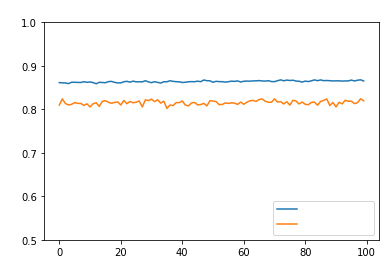

----->Test accuracy for RMSprop : 0.8197000026702881
_________________________________________________________________________________________________________________
----->Training the model with: nadam oprimizer
Epoch 1/100
781/781 [==============================] - 119s 151ms/step - loss: 0.3873 - accuracy: 0.8660 - val_loss: 0.6210 - val_accuracy: 0.8195
Epoch 2/100
781/781 [==============================] - 79s 100ms/step - loss: 0.3879 - accuracy: 0.8640 - val_loss: 0.6013 - val_accuracy: 0.8215
Epoch 3/100
781/781 [==============================] - 76s 97ms/step - loss: 0.3838 - accuracy: 0.8660 - val_loss: 0.6207 - val_accuracy: 0.8137
Epoch 4/100
781/781 [==============================] - 76s 97ms/step - loss: 0.3796 - accuracy: 0.8673 - val_loss: 0.6177 - val_accuracy: 0.8170
Epoch 5/100
781/781 [==============================] - 76s 97ms/step - loss: 0.3815 - accuracy: 0.8680 - val_loss: 0.6240 - val_accuracy: 0.8197
Epoch 6/100
781/781 [==============================] - 76s

781/781 [==============================] - 76s 98ms/step - loss: 0.3822 - accuracy: 0.8673 - val_loss: 0.6190 - val_accuracy: 0.8154
Epoch 56/100
781/781 [==============================] - 76s 97ms/step - loss: 0.3771 - accuracy: 0.8691 - val_loss: 0.6350 - val_accuracy: 0.8132
Epoch 57/100
781/781 [==============================] - 76s 98ms/step - loss: 0.3800 - accuracy: 0.8671 - val_loss: 0.5965 - val_accuracy: 0.8232
Epoch 58/100
781/781 [==============================] - 76s 98ms/step - loss: 0.3778 - accuracy: 0.8701 - val_loss: 0.6140 - val_accuracy: 0.8173
Epoch 59/100
781/781 [==============================] - 76s 98ms/step - loss: 0.3808 - accuracy: 0.8678 - val_loss: 0.6183 - val_accuracy: 0.8185
Epoch 60/100
781/781 [==============================] - 76s 98ms/step - loss: 0.3832 - accuracy: 0.8663 - val_loss: 0.6018 - val_accuracy: 0.8164
Epoch 61/100
781/781 [==============================] - 77s 98ms/step - loss: 0.3780 - accuracy: 0.8692 - val_loss: 0.6219 - val_accuracy

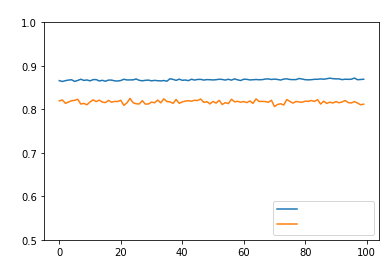

----->Test accuracy for nadam : 0.8119000196456909


In [23]:
from keras.preprocessing.image import ImageDataGenerator

for key in models:
    print("_________________________________________________________________________________________________________________")
    print("----->Training the model with:", key, "oprimizer")
    model = models[key]
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    # prepare iterator
    it_train = datagen.flow(train_images, train_labels, batch_size=64)
    # fit model
    steps = int(train_images.shape[0] / 64)
    history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(test_images, test_labels))
    # evaluate model
    x,acc = model.evaluate(test_images, test_labels, verbose=2)
    # learning curves
    # plot loss
    print("----->Evaluation of the training process for:", key)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.title(key)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()
    print('----->Test accuracy for', key, ':', acc)

In [24]:
# marking the end of the process of the data augmentation model
end_DA_model = date_and_time_now()

### 8. Conclusion

In [25]:
# start and end of the process
print("\n\nSTART AND END -> SIMPLE MODEL:")
print("\tStart: \t" , start_simple_model)
print("\tEnd: \t" , end_simple_model)

print("\n\nSTART AND END -> DATA AUGMENTATION MODEL:")
print("\tStart: \t" , start_DA_model)
print("\tEnd: \t" , end_DA_model)



START AND END -> SIMPLE MODEL:
	Start: 	 2021-04-13 09:07:29
	End: 	 2021-04-13 10:23:16


START AND END -> DATA AUGMENTATION MODEL:
	Start: 	 2021-04-13 10:23:16
	End: 	 2021-04-14 00:16:14


As seen above, adding the augmented images to the original dataset increased the training and the testing time exponentially but also increased the model's accuracy by approximately 10%.

#### Comparison: approximate accuracies (might change from one exeuction to another)

| Optimizor | Simple Model | Data Augmenation Model |
|-----------|--------------|------------------------|
| ADAM      | 70%          | 80%                    |
| ADAMAX    | 71%          | 81%                    |
| ADAGRAD   | 72%          | 80%                    |
| ADADELTA  | 72%          | 81%                    |
| RMSprop   | 68%          | 82%                    |
| NADAM     | 68%          | 80%                    |

As seen in the table above, the "Simple Model" has a lower accuracy compared with the "Data Augmentation Model". Almost all optimizer's accuracy was increased by 10% if the dataset is augmented before the training process.

Your results may vary depending on the environment and evaluation procedure.

<a id="#decision_tree"> </a>
## Decision trees

### Packages needed:
    - Python 3
    - mathplotlib
    - numpy
    - pandas
### Overview
#### Dataset: Iris
    - Iris dataset
    - Has missing values: NO
    - Source: sklearn
    - Number of instances: 150
    - Number of labels: 3
        1. Iris Setosa
        2. Iris Versicolour
        3. Iris Virginica
    - Number of features: 4
        1. sepal length in cm
        2. sepal width in cm
        3. petal length in cm
        4. petal width in cm
#### Process:
   1. Introduction to Deicsion Trees
   2. Iris Flowers and Biology
   3. Visualize the dataset
   4. Requirements
   5. Dividing tthe dataset into training and testing set 
   6. Train the model (default settings)
   7. Testing the model (default settings)
   8. Train the model (min_samples_split)
   9. Testing the model (min_samples_split)
   10. Conclusion

### 1. Introduction to Decision Trees
In machine learning, decision trees are a form of supervised learning in which data is constantly split according to parameters. Trees contain two different types of entities: nodes (also called branch) and leaves, where leaves are the final outcome, and nodes is where the data splits [13].

If things seem too confusing, look at the image below and answer the questions (questions are nodes or branches), while the final answers are called leaves.
<img src="decision_tree.jpeg" alt="Regression Tree" width="500px"> [11]


However, things do get a little more complicated than this, as there are two types of decision trees:
   1. Classification Trees
   2. Regression Trees
   
#### 1. Classification trees
This type of tree matches the example in the picture where the result is binary: true or false. The result of this type of tree is called <b>categorial</b> [13].

#### 2. Regression trees
Regression trees are used to predict a value. To simplify the idea, think about how prices are formed. The price of a house will depend on different factors, such as area, number of rooms, schools around, square footage, and others [13].
<img src="regression_tree.png" alt="Regression Tree" width="500px"> [12]

Now that the notion of "Decision Tree" is understood, we will go into detail about how they work and when they should be used.
Recursive partitioning is used to build a decision tree. Starting from the root node, the node at the very top of the tree, each node represents a decision that will lead to one of the node children. In our example, the root node is "Work to do?" and depending on the answer (yes or no) the data is redirected to one of the node's children: "Stay in" or "Outlook?". The "Stay in" node is a leaf, meaning that it represents a final outcome, while the "Outlook?" node splits further to other children [11].

When real data is inserted into a decision tree, starting from the root, the data split into one child or another depending on its value. In order to create the nodes that split the data, an objective function is required. This function maximizes the information gain at each node that splits the data [11]. 

All this sounds very fancy and difficult, so further, we will implement the popular IRIS dataset to get a better understanding of the Decision Trees.

### 2. Iris Flowers and Biology
Biology? Well, to understand how the Iris Flowers dataset is categorized, we will go over a little bit of biology. 
Iris is a beautiful flower, and if you had never seen one, look at the image below.
<img src="iris.png" alt="Regression Tree" width="500"> [13]

The irises present in the dataset are <b>Iris setosa, Iris virginica, </b>and <b>Iris versicolor</b>. And the record present in the data are the lengths and widths of petals and sepals of these 3 particular kinds of irises (see image below).
<img src="irises.png" alt="Regression Tree" width="500"> [14]

Observing the image above, we can clearly see there are similarities between the different types of flowers, but the objective function calculates the difference between these similarities. If you are interested, you can observe the function in the image below [14],[15]:
<img src="objective_formula.png" alt="Regression Tree" width="500"> [14]


The model we will implement will focus on <b>classification trees</b>, and our goal is to predict each flower from the dataset to which category it belongs. 
The sepal lengths and width in centimeters are stored in columns. These dimensions are called <b>features</b>, and they describe the iris flower.

### 3. Visualize the dataset
The code section below, will help you visuzalize

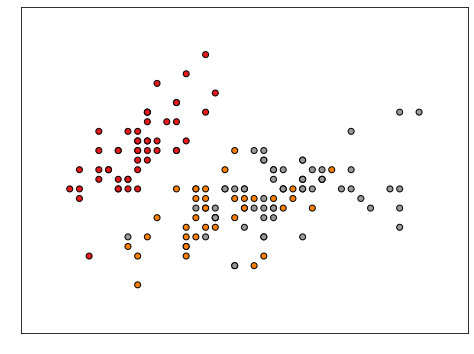

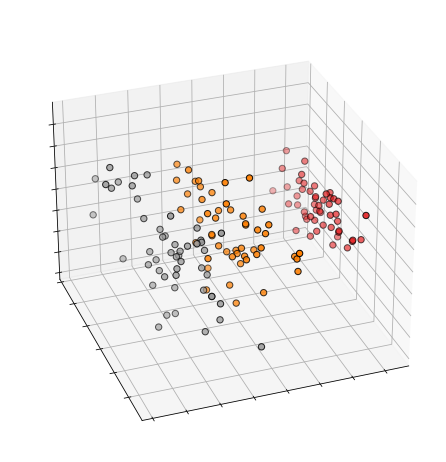

In [26]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Another way to visualise the data, is to see it in a table.

Now that you had visualized the data, is time to implement the model, train it and test it.

We will use a Decision Tree, as it was mentioned above. The dataset contains three different classes where data needs to be categorised:
   1. setosa 
   2. versicolor
   3. virginica
    
Each flower will have the following features:
   1. sepal length
   2. sepal width
   3. petal length
   4. petal width
   
And again, our goal is to predict the iris flower class, depending on its features.

<i>The following tutorial is based on: [16], [17]</i>

### 4. Requirements
The first step is to import all the necessary libraries needed to achieve our goal.


In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

The sklearn.dataset contains multiple datasets, and the one needed for the model is the iris dataset.

From this dataset, we can extract the classes and the features (data). 
   * to extract classes: data.target_names
   * to extract the features: data.data

In [28]:
#Loading the iris data
iris = datasets.load_iris()
print('Classes to predict: ', iris.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [29]:
# extracting data attributes
X = iris.data
# extracting target/ class labels
y = iris.target
print('Number of examples in the data:', X.shape[0])

Number of examples in the data: 150


Now we can visualize all features for each iris.

In [30]:
ir = pd.DataFrame(X)
ir.columns = iris.feature_names
ir['CLASS'] = iris.target
ir.head(7) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),CLASS
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


### 5. Dividing tthe dataset into training and testing set

Until now we had separated the classes and the features. Now it is time to split the data into two different sets:
   1. Training set
   2. Testing set

In [31]:
# using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

### 6. Train the model (default settings)

We will use the DecisionTreeClassifier function from the sklearn library because we are dealing with a classification problem. We will change the criterion parameter to entropy, which sets the measurement for splitting to information gain.

In [32]:
tree = DecisionTreeClassifier(criterion = 'entropy')

Not is an exciting moment when we train the model with the training dataset. The model will be trained to predict the class of the irises based on their features.

In [33]:
# training the decision tree classifier. 
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

After the model had been trained, we can plot a tree so that we can visualize it. This is very useful to understand better how the decisions are made inside the tree.

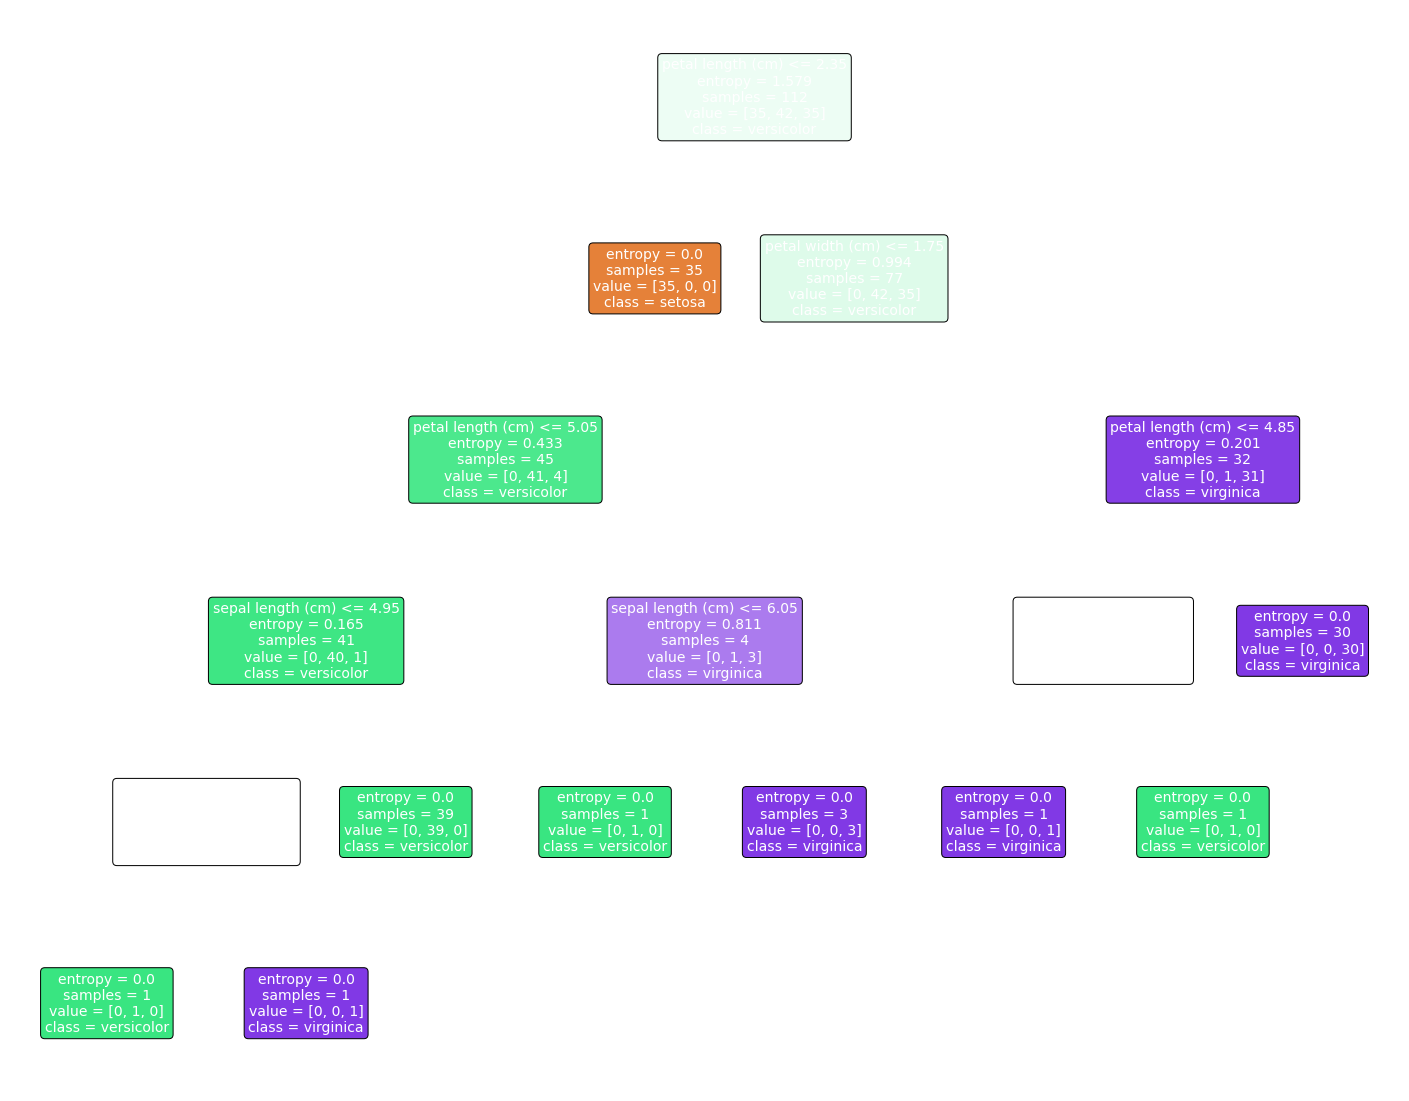

In [34]:
fig = plt.figure(figsize=(25,20))
a = plot_tree(tree, 
      feature_names=iris.feature_names, 
      class_names=iris.target_names, 
      filled=True, 
      rounded=True, 
      fontsize=14)

### 7. Testing the model (default settings)
The model is trained; therefore, it is time to test it. We reached the moment when we test the model and see if we achieved our goal.

In [35]:
# predicting labels on the test set.
y_pred =  tree.predict(X_test)
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=tree.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9736842105263158


### 8. Train the model (min_samples_split)

This step is a bonus, as we change the tree's parameters, trying to improve its precision. Even though, 94% is a pretty good accuracy score.
One of those parameters is <b>"min_samples_split"</b> which specifies the minimum number of samples needed to split an internal node. As seen below, the minimum samle split will be 50.

In [36]:
tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', min_samples_split=50)

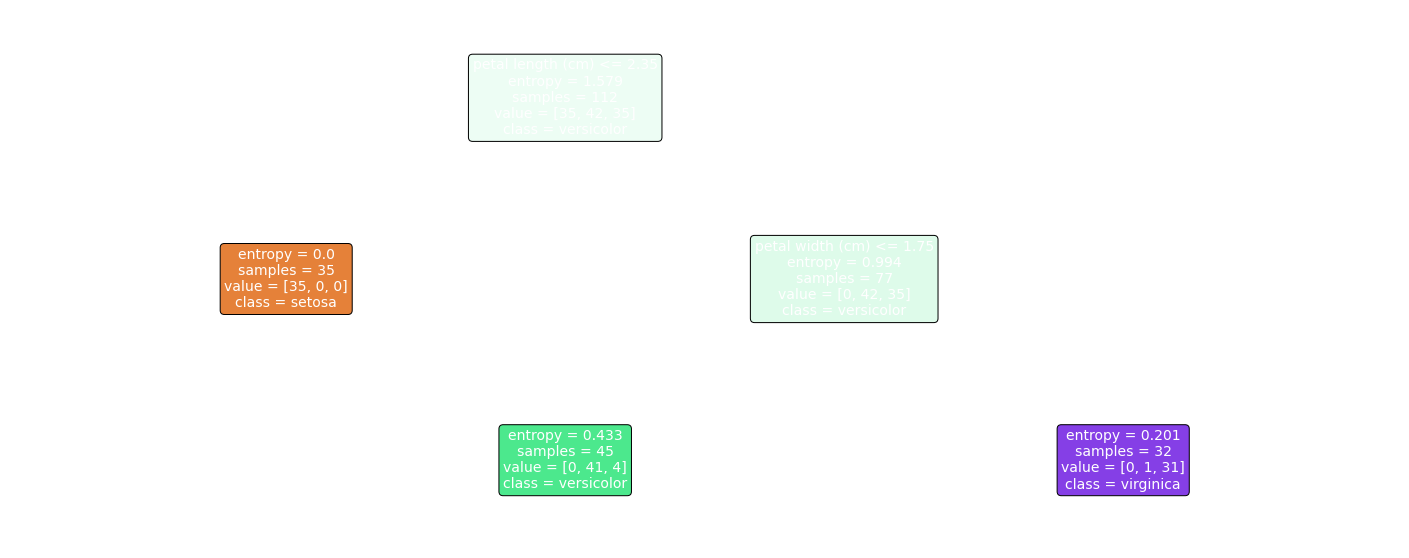

In [37]:
fig = plt.figure(figsize=(25,10))

a = plot_tree(tree, 
      feature_names=iris.feature_names, 
      class_names=iris.target_names, 
      filled=True, 
      rounded=True, 
      fontsize=14)

### 9. Train the model (min_samples_split)

In [38]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=tree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=y_test, y_pred=tree.predict(X_test)))

Accuracy Score on train data:  0.9553571428571429
Accuracy Score on the test data:  0.9736842105263158


### 10. Conclusion

You can see in the plot above that the size of the tree decreased consistently. Therefore, the training score decreased as well, but the accuracy score increased by 3%, which is correlated with the fact that 'min_samples_split' helps balance the decision boundary and prevents overfitting.

<a id="#random_forest"> </a>
## Random Forest

### Packages needed:
    - Python 3
    - seaborn
    - mathplotlib
    - numpy
    - pandas
### Overview
#### Dataset: Iris
    - Iris dataset
    - Has missing values: NO
    - Source: sklearn
    - Number of instances: 150
    - Number of labels: 3
        1. Iris Setosa
        2. Iris Versicolour
        3. Iris Virginica
    - Number of features: 4
        1. sepal length in cm
        2. sepal width in cm
        3. petal length in cm
        4. petal width in cm
#### Process:
   1. Introduction to Random Forest
   2. Random Forest vs Decision Trees
   3. Requirements
   4. Visualize the data
   5. Dividing the dataset into training and testing datasets
   6. Training the model
   7. Testing the model
   8. Conclusion
   

### 1. Introduction to Random Forest
Random forest is a supervised machine learning algorithm, and it is a collection of Decision Trees merged together to increase the prediction's accuracy.
Random forest can be used in classification and regression problems [18].

### 2.  Random Forest vs. Decision Trees
We mentioned above that Radom Forest is a collection of Decision Trees working together. 

If you remember from the section above, when a model is trained using a Decision Tree, the model creates some rules used to make predictions. The Radon Forest algorithm, on the other hand, randomly selects features from data to build multiple decision trees.
Another big difference is that Decision Trees might suffer from overfitting, while Radom Forest prevents this from happening by creating random subsets of features found in the data and will build smaller Decision trees based on those features [18].


#### Importing the necessary libraries and the dataset
Because a Random Forest is a collection of Decision Trees, we are going to use the same dataset (the Iris dataset used for Decision trees in the section above) for this algorithm, so we can compare the results. Keep in mind that the Iris dataset is a small dataset, and the differences might not be significant.

<i>The following tutorial is based on: [17], [18], [19]</i>

Firstly, we will import all the necessary libraries for out model.
### 3. Requirements

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Now we will import the Iris dataset again. 

<i>These two steps should not be repeated as we have all the libraries and the dataset from the section above, but to have a complete picture of the Random Forest algorithm, we will repeat all the steps.</i>

The only library that was not used in the <b>Decision Tree section above</b> is the <b>seaborn</b> library. Seaborn library is based on <b>matplotlib</b> library, used to generate attractive and information graphs. This library works beautifully with the <b>Pandas</b> library allowing us to generate beautiful scatter graphs, for visualization purposes.

In [40]:
iris = datasets.load_iris()

### 4. Visualize the data
Now that the dataset is imported, we will use the Pandas and seaborn libraries to generate several scatter graphs to visualize the Iris dataset.

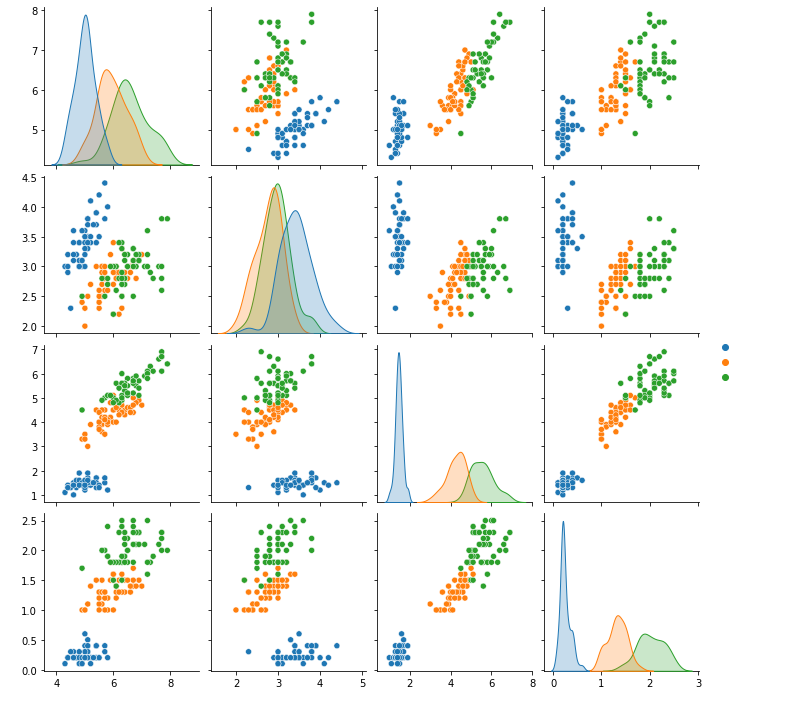

In [41]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])
sns.pairplot(df, hue='species')

Marked with <b>blue</b> is the "setosa" iris flower, which is easily distinguished from the "versicolor" and "virginica" because of its petal length and width. The other two types of Iris are pretty similar; that is why you can see them in the scatter graph, very close to each other.

### 5. Dividing the dataset into training and testing datasets
Typically, a dataset is divided into 25% for testing and 75% for training, but for this model we will split data in half, 50% for training and 50% for testing.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)

### 6. Training the model
Now that the data had been divided into two different sets: one for training one for testing, it is time to use the training set, to train the model.

In [43]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

### 7.  Testing the model
Now that the model is fully trained, it is time to feed it with some unseen data from the testing dataset, and observe how it predicts the classes the data belongs to, according to its features.

In [44]:
predicted = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print("Accuracy score: " , random_forest.oob_score_)

Accuracy score:  0.96


We can use <b>Pands</b> library to visualize how the model classified the testing dataset.
The "confusion matrix" below shows how the test dataset was classified. The diagonal represents the valid couns, and the other squares represent false positive counts. 
We can observe that 5 counts were classified incorrectly, but the amount of confusion exhibited is very small.

<AxesSubplot:>

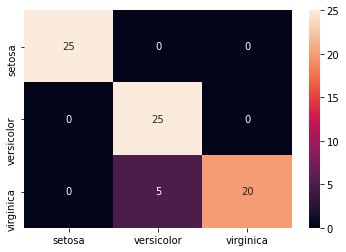

In [45]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

### 8. Conclusion

Comparing the Decision Tree predition with the Radom forest:
   - Decision Tree accuracy: 97%
   - Random Forest accuracy: 96%

The results are almost the same, with 1% difference between the testing accuracy. The difference is almost insignificant, and the accuracy score is considered high for both models.

<a id="#reinforcement_learning"> </a>
## Reinforcement learning

### Packages needed:
    - Python 3
    - random
    - NumPy
    - Keras
#### Process:
   1. Introduction to Tic-Tac-Toe
   2. Introduction to Reinforcement Learning
   3. Deep Neural Networks
   4. The game board and environment
   5. The game rules and winning result
   6. Testing the game
   7. Game simulator
   8. Random games
   9. Creating the model
   10. Train the model
   11. Testing the model
   12. The model versus human
   13. Conclusion
   

### 1. Introduction Tic-Tac-Toe

If you did not hear about the Tic-Tac-Toe game, do not worry, we will go over the rules of playing before deepening into deep machine learning.
It is a very simple game that involves the player planning ahead and figuring out what the opposite player is planning. It sounds just like chess, but it is way simpler [24].

##### Rules 
   1. The game is played on a grid 3x3 with 3 rows and 3 columns
   2. One of the player plays with X and the opponent with 0
   3. Who plays with X has the first move
   4. Players take turns putting their marks in the empty squares
   5. First player that gets 3 of its symbols in a row, diagonal, or column is the winner
   6. If all 9 squares are full, and no player won it is called a tie - no player wins
   
   <img src="xo.jpeg" alt="Tic Tac Toe" width="300"> [24]
   
The game is pretty simple, isn't it? Do not worry, we will play it against our own model so that you can understand it better!

### 2. Introduction to Reinforcement Learning

<i>"The idea that we learn by interacting with our environment is probably the first to occur to us when we think about the nature of learning" </i> - Mark Lee, Reinforcement Learning [27]

The quote above describes perfectly what <b> reinforcement learning</b> is all about: learning from the environment, interaction, and experience. Any living being learns from these actions after they are born, and the process is fast at the beginning of our life and slower as we age but is never finished.

Similarly, computers learn the same way using reinforcement learning. In computers, we have an agent and an environment. The <b>agent</b> evaluates the environment and chooses an appropriate <b>action</b>. The agent is then rewarded. The environment then is changed to assimilate to action the agent took and is again evaluated by the agent for the next choice [25].
<img src="MDP.png" alt="markov" width="500"> [28]

Before we proceed to an example, we need to clarify the most important terms in Reinforcement Artificial Intelligence [28]:
   1. <b>Agent</b>: is the entity that performs actions in an environment to obtain rewards
   2. <b>Environment (e)</b>: a scanrio tahat requires actions
   3. <b>Reward (R)</b>: a return given to the agent when it performs a specific task
   4. <b>State (S)</b>: current state of the environment
   5. <b>Policy</b>: is a strategy that needs to be applied by the agent to decide the next action, and it based on the current state
   7. <b>Action (A)</b>: the move the agent takes in the current state
   8. <b>Value</b>: in contrast to the short-term gain, a long-term return with a discount is predicted
   9. <b>Value Function</b>: represents how good is a state for an agent to be in
   10. <b>Model of the environment</b>: mimics the behavior of the environment 
   11. <b>Model based methods</b>: it is a model-based approach for dealing with reinforcement learning problems


Now let's see a simple example: <img src="robot.png" alt="robot" width="500"> [27]
We have a robot that can move in a straight line (image above): it can move one step to the right or one move to the left. 
The <b>environment</b> is the straight line with nodes from 0 to 4. The nodes are the <b>states</b> of the environment. The <b>agent</b> is the little robot, and the <b>goal</b> is to reach node number 3 (marked with green). 
If the agent tries to move left from position 0 or right from position 4, the agent stays still. Everytime the agent moves to the right or left, the environment gives the agent a <b>reward</b> of <b>-1</b>, and updates its state. If the agent reaches node number 3, it receives a reward of +10, meaning that it had achieved its goal [27].

Now let's image 2 scenarios:
   1. <u>Scanario number 1</u>:
       - The agent moves to the left (node 0)  
       - The agent is rewarded -1 -> R(-1)   <i>(-1) = -1</i>
       - The new state is presented to the agent -> S(0)
       - The agent moves to the right (node 1)
       - The agent is rewarded -1 -> R(-2)   <i>(-1) + (-1) = -2</i>
       - The new state is presented to the agent -> S(1)
       - The agent moves to the right (node 2)
       - The agent is rewarded -1 -> R(-3)   <i>(-1) + (-1) + (-1) = -3</i>
       - The new state is presented to the agent -> S(2)
       - The agent moves to the right (node 3)
       - The agent is rewarded 10 -> R(7)    <i>(-1) + (-1) + (-1) + 10 = 7</i>
       - The new state is presented to the agent -> S(3)
       - The agent reached its goal
       
       
   2. <u>Scanario number 2</u>:
       - The agent moves to the right (node 2)
       - The agent is rewarded -1 -> R(-3)   <i>(-1) = -1</i>
       - The new state is presented to the agent -> S(2)
       - The agent moves to the right (node 3)
       - The agent is rewarded 10 -> R(7)    <i>(-1) + 10 = 9</i>
       - The new state is presented to the agent -> S(3)
       - The agent reached its goal
       
In both scenarios, the goal was achieved but with different rewards. In the first scenario, the agent reached its goal with <b>7</b> while in the second scenario, it reached its goal with a reward of <b>9</b>.
Comparing the two outcomes, the agent learned that map a particular action with a state and how to maximize its required [27]. 

The goal of reinforcement learning is to determine the agent to evaluate the environment and "understand" what actions will reach its goal faster and get the maximum reward. Of course, as mentioned above, this is achieved by experimenting.  

### 3. Deep Neural Networks

We spoke in earlier sections about Convolutional Neural Networks, so the terms used in this section will be familiar to you, and also, we do not need to go very deep to understand it.

In Machine Learning, a neuron is a function unique in the network which receives, transforms and passes the information from the previous layer to the next. Each layer in the network computes more and more complex information. The input obtained from the connected neurons in the previous layer is combined and weighed in order to transmit the signal from one neuron to another. The weighted inputs are transformed in a non-linear way; as a linear way, complex features would be impossible [29]. 

The difference between <b>Convolutional Neural Networks (CNN)</b> and <b>Deep Neural Networks (DNN)</b> resides in the number of layers the model has: a DNN has at least four layers, including the input and the output layer. Therefore, any neural net can qualify as Deep Learning if the number of layers is greater or equal to four [29].

For the Tic-Tac-Toe game, we are going to implement; there are 26.830 unique games on a 3 by 3 grid. If the game is well played, it will always end in a draw. Simple games such as Tic-Tac-Toe are perfect for understanding and learning Deep Neural Networks, using simple techniques, and getting good results [26]. 

In the following sections, though, the steps will be more complex than in the models we used before.

<i>The following tutorial is based on: [30] and [26] </i>

### 4. The game board and environment

This section will use pure Python to create the game board and environment for the game.


Our first method <b>initBoard</b> initiates the 3x3 board using a 2D array. The 2D array has 3 rows and 3 columns, initiating all index positions to zero.

In [46]:
def initBoard():
    board = [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    return board

The <b>getMoves</b> function, keeps a record of all valid moves available on the board.

In [47]:
def getMoves(board):
    moves = []
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 0:
                moves.append((i, j))
    return moves

### 5.The game rules and winning result
The <b>getWinner</b>function, checks all the rows, columns and diagonals in search of a winner. A winner is declared if a player was able to mark its symbol on a whole row, column, or diagonal.

The function returns:
   - <b>-1</b> if the game is not over
   - <b> 0</b> the game is a tie
   - <b> 1</b> the player with the <b>X</b> symbol wins
   - <b> 2</b> the player with the <b>0</b> symbol wins

In [48]:
def getWinner(board):
    candidate = 0
    won = 0
    
    # Check rows
    for i in range(len(board)):
        candidate = 0
        for j in range(len(board[i])):
            
            # Make sure there are no gaps
            if board[i][j] == 0:
                break
            
            # Identify the front-runner
            if candidate == 0:
                candidate = board[i][j]
            
            # Determine whether the front-runner has all the slots
            if candidate != board[i][j]:
                break
            elif j == len(board[i]) - 1:
                won = candidate
    
    if won > 0:
        return won
    
    # Check columns
    for j in range(len(board[0])):
        candidate = 0
        for i in range(len(board)):
            
            # Make sure there are no gaps
            if board[i][j] == 0:
                break
            
            # Identify the front-runner
            if candidate == 0:
                candidate = board[i][j]
            
            # Determine whether the front-runner has all the slots
            if candidate != board[i][j]:
                break
            elif i == len(board) - 1:
                won = candidate
    
    if won > 0:
        return won
    
    # Check diagonals
    candidate = 0
    for i in range(len(board)):
        if board[i][i] == 0:
            break
        if candidate == 0:
            candidate = board[i][i]
        if candidate != board[i][i]:
            break
        elif i == len(board) - 1:
            won = candidate
    
    if won > 0:
        return won
    
    candidate = 0
    for i in range(len(board)):
        if board[2 - i][2 - i] == 0:
            break
        if candidate == 0:
            candidate = board[2 - i][2 - i]
        if candidate != board[2 - i][2 - i]:
            break
        elif i == len(board) - 1:
            won = candidate
    
    if won > 0:
        return won
    
    # Still no winner?
    if (len(getMoves(board)) == 0):
        # It's a draw
        return 0
    else:
        # Still more moves to make
        return -1

The <b>printBoard</b> function prints the board of the game after each move, displaying where the players had marked their symbols. 

In [49]:
def printBoard(board):
    for i in range(len(board)):
        for j in range(len(board[i])):
            mark = ' '
            if board[i][j] == 1:
                mark = 'X'
            elif board[i][j] == 2:
                mark = 'O'
            if (j == len(board[i]) - 1):
                print(mark)
            else:
                print(str(mark) + "|", end='')
        if (i < len(board) - 1):
            print("-----")

### 6.Testing the game

Having the game rules, the environment, and the board implemented is time to test the game.
Firstly, we will initiate and print the empty board.

In [50]:
b = initBoard()
printBoard(b)

 | | 
-----
 | | 
-----
 | | 


Now we will test the <b>getMoves</b> method, to see if we get the correct empty sqares, where players can mark their symbols.

In [51]:
print(getMoves(b))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


Now, that now moves had been perfomed, is time to check the <b>getWinner</b> function, which sould return <b>-1</b> as the game is not completed.

In [52]:
print(getWinner(b))

-1


Now, let's place the X symbol on one of the diagonals and check if the player is marked as the winner.
The return of the <b>getWinner</b> should be <b>1</b> as the playher with the X symbol had win.

In [53]:
b = initBoard()
b[0][0] = 1
b[0][1] = 2
b[1][1] = 1
b[1][0] = 2
b[2][2] = 1
printBoard(b)
print(getWinner(b))

X|O| 
-----
O|X| 
-----
 | |X
1


For the second test, we will re-initiate the board, and we are going to post 0 on the last column, a fact that would make the player with 0 symbol the winner. The <b>getWinner</b> function in this situation will return 2.

In [54]:
b = initBoard()
b[0][0] = 1
b[0][2] = 2
b[0][1] = 1
b[1][2] = 2
b[1][1] = 1
b[2][2] = 2
printBoard(b)
print(getWinner(b))

X|X|O
-----
 |X|O
-----
 | |O
2


For the last test, we will populate all the squares with symbols, but no player will have the win. Therefore, the value returned by the <b>getWinner</b> will return 0.

In [55]:
b = initBoard()
b[0][1] = 1
b[1][0] = 2
b[2][0] = 1
b[2][1] = 2
b[2][2] = 1
b[0][0] = 2
b[0][2] = 1
b[1][2] = 2
b[1][1] = 1
printBoard(b)
print(getWinner(b))

O|X|X
-----
O|X|O
-----
X|O|X
0


Successfully, we were able to pass all the tests, which means that the game's rules and environment were correctly implemented.

### 7. Game simulator
The next step is to create a function that will allow us to automate playing games. The purpose of this method is to simulate faster, actual games. Without the simulator, when the model is created, we would have to play a large number of games against the model to see how it performs [26].

The simulator comes with several advantages:
   - The simulator creates a large collection of training data
   - The simulator allows us to measure the games
   - The simulator will save a lot of time

Firstly we will implement the <b>bestMove</b> method 

The <b>simulateGame</b> function simulates a game of Tic-Tac-Toe, based on the environment and on the rules we implemented and tested in earlier sections.

The function is complex and calls the <b>bestMove</b> method that had not been implemented yet. However, do not worry; we will get to its implementation as well when is required. For the moment, its implementation is not required.

In [56]:
import random
def simulateGame(p1=None, p2=None, rnd=0):
    history = []
    board = initBoard()
    playerToMove = 1
    
    while getWinner(board) == -1:
        
        # Chose a move (random or use a player model if provided)
        move = None
        if playerToMove == 1 and p1 != None:
            move = bestMove(board, p1, playerToMove, rnd)
        elif playerToMove == 2 and p2 != None:
            move = bestMove(board, p2, playerToMove, rnd)
        else:
            moves = getMoves(board)
            move = moves[random.randint(0, len(moves) - 1)]
        
        # Make the move
        board[move[0]][move[1]] = playerToMove
        
        # Add the move to the history
        history.append((playerToMove, move))
        
        # Switch the active player
        playerToMove = 1 if playerToMove == 2 else 2
        
    return history

When we run the <b>simuateGame</b> method, we can see it returns a tuples list. The first integer from each tuple represents the player who moved (1 for X, 2 for 0). Furthermore, the inner tuple represents the position from the 2D array, where the player in question made the mode.

In [57]:
history = simulateGame()
print(history)

[(1, (1, 1)), (2, (2, 0)), (1, (0, 0)), (2, (0, 1)), (1, (1, 2)), (2, (0, 2)), (1, (1, 0))]


What would be great is to see the board's state after each move. Therefore, our next method will iterate through the history list and will populate the board with the moves already performed. We will call this method <b>movesToBoard</b>.

In [58]:
def movesToBoard(moves):
    board = initBoard()
    for move in moves:
        player = move[0]
        coords = move[1]
        board[coords[0]][coords[1]] = player
    return board

Now that the method is implemented, we can call this method passing the history as a parameter. The function will print the current state of the board.

In [59]:
board = movesToBoard(history)
printBoard(board)
print(getWinner(board))

X|O|O
-----
X|X|X
-----
O| | 
1


### 8. Random games

Now that our simulator is completed, we will simulate 1000 games. The simulation will take a few seconds, while a manual simulation of 1000 games would have taken hours.

In [60]:
games = [simulateGame() for _ in range(10000)]

The data obtained from this simulation is enormous. We can actually see all the simulated games' data if we print the <b>games</b> variable.

In [61]:
print(games)

[[(1, (2, 2)), (2, (1, 0)), (1, (0, 2)), (2, (1, 1)), (1, (1, 2))], [(1, (2, 1)), (2, (0, 1)), (1, (0, 2)), (2, (2, 0)), (1, (1, 1)), (2, (1, 0)), (1, (2, 2)), (2, (1, 2)), (1, (0, 0))], [(1, (2, 0)), (2, (0, 2)), (1, (1, 1)), (2, (1, 0)), (1, (2, 2)), (2, (2, 1)), (1, (0, 0))], [(1, (0, 1)), (2, (1, 1)), (1, (0, 0)), (2, (0, 2)), (1, (2, 2)), (2, (1, 0)), (1, (1, 2)), (2, (2, 1)), (1, (2, 0))], [(1, (1, 0)), (2, (2, 2)), (1, (0, 1)), (2, (2, 1)), (1, (0, 0)), (2, (0, 2)), (1, (2, 0))], [(1, (1, 1)), (2, (2, 1)), (1, (2, 0)), (2, (0, 0)), (1, (1, 2)), (2, (2, 2)), (1, (1, 0))], [(1, (0, 2)), (2, (0, 0)), (1, (1, 0)), (2, (2, 1)), (1, (0, 1)), (2, (1, 2)), (1, (2, 0)), (2, (2, 2)), (1, (1, 1))], [(1, (0, 1)), (2, (2, 2)), (1, (1, 1)), (2, (1, 2)), (1, (1, 0)), (2, (0, 0)), (1, (2, 1))], [(1, (1, 0)), (2, (2, 2)), (1, (2, 0)), (2, (1, 2)), (1, (0, 2)), (2, (0, 1)), (1, (1, 1)), (2, (0, 0)), (1, (2, 1))], [(1, (1, 2)), (2, (0, 1)), (1, (0, 0)), (2, (2, 1)), (1, (0, 2)), (2, (1, 0)), (1, (

For our model, this data is precious but for humans is just a string of numbers. 
Next, we will implement a function that will return the game statistics in a human-readable form: how many games were won, how many were a tie, and who won the most games: X or ).
The method that returns this brief about the 1000 simulation is the method below called <b>gameStats</b>.

In [62]:
def gameStats(games, player=1):
    stats = {"win": 0, "loss": 0, "draw": 0}
    for game in games:
        result = getWinner(movesToBoard(game))
        if result == -1:
            continue
        elif result == player:
            stats["win"] += 1
        elif result == 0:
            stats["draw"] += 1
        else:
            stats["loss"] += 1
    
    winPct = stats["win"] / len(games) * 100
    lossPct = stats["loss"] / len(games) * 100
    drawPct = stats["draw"] / len(games) * 100

    print("Results for player %d:" % (player))
    print("Wins: %d (%.1f%%)" % (stats["win"], winPct))
    print("Loss: %d (%.1f%%)" % (stats["loss"], lossPct))
    print("Draw: %d (%.1f%%)" % (stats["draw"], drawPct))

Now that the method had been implemented, we can require both players' stats individually and analyze the data. This data will be used to train our model.

<b>Note:</b> <font color='red'>Remember that our simulator does not possess any intelligence at this moment in time. It is just marking squares according to their availability. </font> 

In [63]:
gameStats(games, player=1)
print()
gameStats(games, player=2)

Results for player 1:
Wins: 5119 (51.2%)
Loss: 2455 (24.6%)
Draw: 2426 (24.3%)

Results for player 2:
Wins: 2455 (24.6%)
Loss: 5119 (51.2%)
Draw: 2426 (24.3%)


### 9. Creating the model
We talked in the Convolutional Neural Network about the sequential model and its layers. If you cannot remember those click <a href="#CNN">here</a> to to refresh your memory

The DNN model has as input different environment states, and as an output, it has the resulting outcome for each game associated with the environment state. 

Therefore, the input data is an array with nine elements, one for each square of the board, and the output is an array with three elements that denote the possible outcome of the game: win, loss, or draw.

Looking at the layers of the model, we are already familiar with each one of them, the only difference is that we worked with images in the CNN model, while here we work with environments and states. 


In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.backend import reshape
from keras.utils.np_utils import to_categorical
import numpy as np
def getModel():
    numCells = 9
    outcomes = 3
    model = Sequential()
    model.add(Dense(200, activation='relu', input_shape=(9, )))
    model.add(Dropout(0.2))
    model.add(Dense(125, activation='relu'))
    model.add(Dense(75, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(outcomes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

### 10. Train the model
The 1000 games we simulated above will be used as training data. However, before we proceed with the training process, we need to transform the data into a format that our model can consume:
    - Each game is divided into different board states, with each board labeled with the game's final outcome
    - Each board is flattened into a 1D array
    
These two action are obtained with the <b>gamesToWinLossData()</b> method below:

In [65]:
def gamesToWinLossData(games):
    X = []
    y = []
    for game in games:
        winner = getWinner(movesToBoard(game))
        for move in range(len(game)):
            X.append(movesToBoard(game[:(move + 1)]))
            y.append(winner)

    X = np.array(X).reshape((-1, 9))
    y = to_categorical(y)
    
    # Return an appropriate train/test split
    trainNum = int(len(X) * 0.8)
    return (X[:trainNum], X[trainNum:], y[:trainNum], y[trainNum:])

Now that the training data can be formatted within the model using the <b>gamesToWinLossData</b>, it is time to train the model.

In [66]:
model = getModel()
X_train, X_test, y_train, y_test = gamesToWinLossData(games)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100)

Epoch 1/100
627/627 [==============================] - 7s 6ms/step - loss: 1.0302 - acc: 0.4983 - val_loss: 0.9661 - val_acc: 0.5466
Epoch 2/100
627/627 [==============================] - 3s 5ms/step - loss: 0.9660 - acc: 0.5386 - val_loss: 0.9283 - val_acc: 0.5653
Epoch 3/100
627/627 [==============================] - 3s 5ms/step - loss: 0.9181 - acc: 0.5599 - val_loss: 0.8868 - val_acc: 0.5808
Epoch 4/100
627/627 [==============================] - 3s 5ms/step - loss: 0.8951 - acc: 0.5690 - val_loss: 0.8716 - val_acc: 0.5877
Epoch 5/100
627/627 [==============================] - 3s 5ms/step - loss: 0.8739 - acc: 0.5812 - val_loss: 0.8537 - val_acc: 0.5957
Epoch 6/100
627/627 [==============================] - 3s 5ms/step - loss: 0.8552 - acc: 0.5915 - val_loss: 0.8346 - val_acc: 0.6064
Epoch 7/100
627/627 [==============================] - 3s 5ms/step - loss: 0.8434 - acc: 0.6005 - val_loss: 0.8232 - val_acc: 0.6093
Epoch 8/100
627/627 [==============================] - 3s 5ms/step - 

627/627 [==============================] - 3s 5ms/step - loss: 0.7565 - acc: 0.6362 - val_loss: 0.7615 - val_acc: 0.6300
Epoch 63/100
627/627 [==============================] - 3s 5ms/step - loss: 0.7560 - acc: 0.6388 - val_loss: 0.7566 - val_acc: 0.6323
Epoch 64/100
627/627 [==============================] - 3s 5ms/step - loss: 0.7571 - acc: 0.6378 - val_loss: 0.7604 - val_acc: 0.6354
Epoch 65/100
627/627 [==============================] - 3s 5ms/step - loss: 0.7585 - acc: 0.6371 - val_loss: 0.7575 - val_acc: 0.6333
Epoch 66/100
627/627 [==============================] - 3s 5ms/step - loss: 0.7556 - acc: 0.6392 - val_loss: 0.7560 - val_acc: 0.6340
Epoch 67/100
627/627 [==============================] - 3s 5ms/step - loss: 0.7513 - acc: 0.6414 - val_loss: 0.7601 - val_acc: 0.6318
Epoch 68/100
627/627 [==============================] - 3s 5ms/step - loss: 0.7590 - acc: 0.6344 - val_loss: 0.7576 - val_acc: 0.6268
Epoch 69/100
627/627 [==============================] - 3s 5ms/step - loss:

### 11. Testing the model
Now that the model is fully trained is time to test it and see how well it can play games against our random simulator without intelligence, against another trained model, and why not against us!

Before we can proceed, we need to implement a method (below) called <b>bestMove()</b> that allows the model to analyze the environment and its state and decide what the most favorable move the agent can make to the ultimate goal: to win the game is.

In [67]:
def bestMove(board, model, player, rnd=0):
    scores = []
    moves = getMoves(board)
    
    # Make predictions for each possible move
    for i in range(len(moves)):
        future = np.array(board)
        future[moves[i][0]][moves[i][1]] = player
        prediction = model.predict(future.reshape((-1, 9)))[0]
        if player == 1:
            winPrediction = prediction[1]
            lossPrediction = prediction[2]
        else:
            winPrediction = prediction[2]
            lossPrediction = prediction[1]
        drawPrediction = prediction[0]
        if winPrediction - lossPrediction > 0:
            scores.append(winPrediction - lossPrediction)
        else:
            scores.append(drawPrediction - lossPrediction)

    # Choose the best move with a random factor
    bestMoves = np.flip(np.argsort(scores))
    for i in range(len(bestMoves)):
        if random.random() * rnd < 0.5:
            return moves[bestMoves[i]]

    # Choose a move completely at random
    return moves[random.randint(0, len(moves) - 1)]

#### 1. Model (X) against Random Simulator (0)
Now that the <b>bestMove</b> method is implemented is time to test our model against the random simulator. The trained model will play with the symbol X, while the random simulator will play with the symbol O.
After the model is tested against the random simulator for 1000 games, we will print the game statistics and see how well our model performed.

In [68]:
games2 = [simulateGame(p1=model) for _ in range(1000)]
gameStats(games2)

Results for player 1:
Wins: 913 (91.3%)
Loss: 17 (1.7%)
Draw: 70 (7.0%)


According to the statistics the model having the first move, had won more than 80% of the games. These results compared with the random simulator are approximately 30% higher, which is significant, and demonstrates the intelligence accuired by the model due to training.

#### 2. Random Simulator (X) against Model (0)
Having the first move (playing with symbol X), the model performed very well. Not let's test our model against the random simulator again, but this time our model will be at a disadvantage playing with the symbol O. The player with symbol O does not start the game; therefore, the game's difficulty level is increased.

In [69]:
games3 = [simulateGame(p2=model) for _ in range(1000)]
gameStats(games3, player=2)

Results for player 2:
Wins: 462 (46.2%)
Loss: 68 (6.8%)
Draw: 470 (47.0%)


From the statistics generated, we can see that if the model does not have the first move (symbol X) its wins are dropping consistently. However, that was expected, as even humans, if they have the second move, they are at a disadvantage in most games such as Tic-Tac_Toe, Chess, and others.

#### 3. Model vs Model
Ok!  Let's have a little bit more fun by allowing the model to play on both sides. SO that the 1000 games will not look the same, we will add a pinch of randomness to the game to force the model to choose different moves for each game.

In [70]:
games4 = [simulateGame(p1=model, p2=model, rnd=0.6) for _ in range(1000)]
gameStats(games4, player=1)
print()
gameStats(games4, player=2)

Results for player 1:
Wins: 704 (70.4%)
Loss: 46 (4.6%)
Draw: 250 (25.0%)

Results for player 2:
Wins: 46 (4.6%)
Loss: 704 (70.4%)
Draw: 250 (25.0%)


As expected, model 1 that had the first move had won double the number of games, but overall both models played their best moves to win the games. Therefore, more than 50% of games ended in a tie.

In [71]:
print("Average length of fully random game is %f moves" % (np.mean([float(len(game)) for game in games])))
print("Average length of game where P1 uses NN is %f moves" % (np.mean([float(len(game)) for game in games2])))
print("Average length of game where P2 uses NN is %f moves" % (np.mean([float(len(game)) for game in games3])))
print("Average length of game where both use NN is %f moves" % (np.mean([float(len(game)) for game in games4])))

Average length of fully random game is 7.831100 moves
Average length of game where P1 uses NN is 6.941000 moves
Average length of game where P2 uses NN is 7.542000 moves
Average length of game where both use NN is 7.326000 moves


### 12. The model versus human
   
#### 4. Model (X) vs Human (0)

Now, I will play against the model and try to win the game. It might be more difficult than I expect, as I am playing a trained model and that perform the best moves by scanning the environment.

In [72]:
def HumanVSModel():
    board = initBoard()
    winner = getWinner(board)
    while winner == -1:
        move = bestMove(board, model, 1)
        board[move[0]][move[1]] = 1
        printBoard(board)
        if getWinner(board) == -1:
            row = input ("\nInsert row: ")
            col = input ("Insert col: ")
            board[int(row)][int(col)] = 2
            print()
            printBoard(board)
        print("\n-----------------\n")
        winner = getWinner(board)
    if winner == 2:
        print("The winner is: the human")
    if winner == 1:
        print("The winner is: the model")
    if winner == 0:
        print("It is a tie!")
        

In [ ]:
HumanVSModel()

 | | 
-----
 | | 
-----
 | |X


### 13. Conclusion
The game's implementation is superficial, as the board does not check if we overwrite a symbol. The model was trained correctly and will mark only the empty squares, but the python implementation of the board and rules can increase in complexity and reliability. 
However, this tutorial was focused on training a model using <b>reinforcement learning</b> and <b>deep neural networks</b>, and that we had succeeded beautifully. 
The player who has the first move has a higher chance of winning the game, and playing again a trained model seems challenging; even the Tic-Tac_toe game is considered simple.

An interesting observation is that if the model has the first move, it plays to win, while if it has the second move, it plays to finish in a tie. This could be corrected with a different data set, as these features of the model were gained from the training process.  

# Conclusion

All five tutorials presented in this Jupyter Notebook are just scratching the surface of Artificial Intelligence and Machine Learning. However, all the knowledge and the skills gained by following this tutorial are a strong base for beginners. 
This tutorial is based on resources and other tutorials that can be found in the section below. Each section of this notebook was altered from the original source and described to benefit beginners who would like to understand and observe Machine Learning's power and what it can achieve with it.

# References


   1. Jason Brownlee (2017), "How to Handle Missing Data with Python", Available at: https://machinelearningmastery.com/handle-missing-data-python/, (Accessed 10 December 2020)

   2. Tyler Doll, 2018, "LDA Topic Modeling: An Explanation", Available at: https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd, (Accessed 01.01.2021)

   3. Tenserflow (2020), "Convolutional Neural Network (CNN)", Available at: https://www.tensorflow.org/tutorials/images/cnn, (Accessed 05.01.2020)

   4. Theodora Tataru and Liliana O'Sullivan (2020), "4​th​ Year Data Science CA 1- Research Document" Available at: https://instituteoftechnol663-my.sharepoint.com/:b:/g/personal/c00231174_itcarlow_ie/EaPwa2jNdhxEs0FtRfYoPlABahguc5fn0Rd8gf93eeLYEw?e=r3ywIz, (Accessed 05.01.2020)

   5. Douglas Daseeco (2017), “How does AI learn?”, Available at: https://ai.stackexchange.com/questions/3640/how-does-an-ai-learn, (Accessed 05.01.2021)

   6. Matthew Hutson (2018), “How researchers are teaching AI to learn like a child”, Available at: https://www.sciencemag.org/news/2018/05/howresearchers-are-teaching-ai-learn-child, (Accessed 05.01.2021)

   7. Daksh Trehan (2020), "Convolutional Neural Networks", Available at: https://medium.com/towards-artificial-intelligence/convolutional-neural-networks-for-dummies-afd7166cd9e, (Accessed 22.01.2021)

   8. Ben Dickson (2020), "What are convolutional neural networks (CNN)?", Available at: https://bdtechtalks.com/2020/01/06/convolutional-neural-networks-cnn-convnets/, (Accessed 22.01.2021)

   9. Sebastian Ruder (2016), "An overview of gradient descent optimization algorithms", Available at: https://ruder.io/optimizing-gradient-descent/index.html#momentum, (Accessed 27.02.2021)

   10. Arun Gandhi (2021), "Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2", Available at: 
    https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/, (Accessed 19.03.2021)

   11. Loreinne Li (2019), "Classification and Regression Analysis with Decision Trees", Available at https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054, (Accessed 23.03.2021)

   12. Samet Girgin (2019), "Decision Tree Regression in 6 Steps with Python", Avaialble at https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16, (Accessed 23.03.2021)
   
   13. Oriant (2017), "Decision Trees for Classification: A Machine Learning Algorithm", Avaialble at https://www.xoriant.com/blog/product-engineering/decision-trees-machine-learning-algorithm.html#:~:text=%7C-,Blog,namely%20decision%20nodes%20and%20leaves, (Accessed 24.03.2021)
   
   14. Susan Candelario (2021), "iris flower collage", Available at https://www.flickr.com/photos/susancandelario/50016355531, (Accessed 24.03.2021)
   
   15. Yong Cui (2020), "The Iris Dataset — A Little Bit of History and Biology", Avaialble at https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5, (Accessed 24.03.2021)
   
   16. Hackerearth (2021), "Decision Tree", Avialable at https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/, (Accessed 24.03.2021) 
   
   17. Piotr Płoński (2020), "Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python", Available at https://mljar.com/blog/visualize-decision-tree/, (Accessed 24.03.2021)
   
   18. Niklas Donges (2019), "A COMPLETE GUIDE TO THE RANDOM FOREST ALGORITHM", Avaialble at https://builtin.com/data-science/random-forest-algorithm, (Accessed 28.03.2021)
   
   19. Fergus Boyles (2017), "Using Random Forests in Python with Scikit-Learn", Avaialable at https://www.blopig.com/blog/2017/07/using-random-forests-in-python-with-scikit-learn/, (Accessed 28.03.2021)
   
   20. Jeremy Jordan (2017), "Convolutional neural networks", Available at https://www.jeremyjordan.me/convolutional-neural-networks/, (Accessed 30.03.2021)
   
   21. Sumit Saha (2018), "A Comprehensive Guide to Convolutional Neural Networks — the ELI5 way", Available at https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53, (Accessed 30.03.2021)
   
   22. Simran Bansari (2019), "Introduction to how CNNs Work" , Avialable at https://medium.datadriveninvestor.com/introduction-to-how-cnns-work-77e0e4cde99b, (Accessed 30.03.2021)
   
   23. Daksh Trehan (2020), "Convolutional Neural Networks for Dummies", Available at https://pub.towardsai.net/convolutional-neural-networks-for-dummies-afd7166cd9e (Accessed 30.03.2021)
   
   24. The Exploratorium (2000), "Tic Tac Toe", Available at https://www.exploratorium.edu/brain_explorer/tictactoe.html, (Accessed 05.04.2021)
   
   25. Partha Pratim Neog (2018), "Not-So-Deep Reinforcement Learning for dummies— Part 1", Available at https://towardsdatascience.com/not-so-deep-reinforcement-learning-for-dummies-part-1-c22416a55535, (Accessed 30.04.2021)
   
   26. Daniel Sauble (2019), "Tic-Tac-Toe and Reinforcement Learning", Available at https://medium.com/swlh/tic-tac-toe-and-deep-neural-networks-ea600bc53f51, (Accessed 07.04.2021)
   
   27. Mark Lee (2005), Reinforcement Learning, Available at http://incompleteideas.net/book/first/ebook/node6.html, (Accessed 07.04.2021)
   
   28. Guru99 (2021), "What is Reinforcement Learning?", Available at https://www.guru99.com/reinforcement-learning-tutorial.html#:~:text=The%20example%20of%20reinforcement%20learning,are%201)%20Positive%202)%20Negative, (Accessed 07.04.2021)
   
   29. Harshit Satyaseel (2018), "An Introduction to Neural Network and Deep Learning For Beginners", Available at https://www.technotification.com/2018/08/neural-networks-deep-learning.html, (Accessed 07.04.2021)
   
   30. Jeremy Zhang (2019), "Reinforcement Learning — Implement TicTacToe", Available at https://towardsdatascience.com/reinforcement-learning-implement-tictactoe-189582bea542, (Accessed 07.04.2021)